In [2]:
library(dplyr)
library(tidyverse)

Warning message:
"package 'dplyr' was built under R version 4.2.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'tidyverse' was built under R version 4.2.3"
Warning message:
"package 'ggplot2' was built under R version 4.2.3"
Warning message:
"package 'tibble' was built under R version 4.2.3"
Warning message:
"package 'tidyr' was built under R version 4.2.3"
Warning message:
"package 'readr' was built under R version 4.2.3"
Warning message:
"package 'purrr' was built under R version 4.2.3"
Warning message:
"package 'forcats' was built under R version 4.2.3"
Warning message:
"package 'lubridate' was built under R version 4.2.3"
── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ ggplot2   3.4.4     

In [3]:
#import data vcdb dataset
df<- read_csv(file="vcdb.csv")

Warning message:
"One or more parsing issues, call `problems()` on your data frame for details, e.g.:
  dat <- vroom(...)
  problems(dat)"
Rows: 7833 Columns: 2397
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr    (52): action.error.notes, action.hacking.cve, action.hacking.notes, a...
dbl    (40): asset.assets.amount.M - Documents, asset.assets.amount.M - Flas...
lgl  (2303): action.environmental.notes, action.environmental.variety.Deteri...
dttm    (2): plus.created, plus.modified

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
#get the count of number of columns
ncol(df)
#get column names
#colnames(df)
'incident_id' %in% names(df)

[1] 2397

[1] TRUE

In [5]:
#remove the unnecessary columns
df<- df %>% select(-contains("action.environmental"))
ncol(df)
'incident_id' %in% names(df)
df<- df %>% select(-contains("action.error"))
ncol(df)
colnames(df)
dim(df)

[1] 2370

[1] TRUE

[1] 2344

[1] "action.hacking.cve"                                                                                
   [2] "action.hacking.notes"                                                                              
   [3] "action.hacking.result.Elevate"                                                                     
   [4] "action.hacking.result.Exfiltrate"                                                                  
   [5] "action.hacking.result.Infiltrate"                                                                  
   [6] "action.hacking.variety.Abuse of functionality"                                                     
   [7] "action.hacking.variety.Brute force"                                                                
   [8] "action.hacking.variety.Buffer overflow"                                                            
   [9] "action.hacking.variety.Cache poisoning"                                                            
  [10] "action.hacking.variety.Cryptanalysis"                                                              
  [11] "action.hacking.variety.CSRF"                                                                       
  [12] "action.hacking.variety.DoS"                                                                        
  [13] "action.hacking.variety.Footprinting"                                                               
  [14] "action.hacking.variety.Forced browsing"                                                            
  [15] "action.hacking.variety.Format string attack"                                                       
  [16] "action.hacking.variety.Fuzz testing"                                                               
  [17] "action.hacking.variety.HTTP request smuggling"                                                     
  [18] "action.hacking.variety.HTTP request splitting"                                                     
  [19] "action.hacking.variety.HTTP response smuggling"                                                    
  [20] "action.hacking.variety.HTTP Response Splitting"                                                    
  [21] "action.hacking.variety.Integer overflows"                                                          
  [22] "action.hacking.variety.LDAP injection"                                                             
  [23] "action.hacking.variety.Mail command injection"                                                     
  [24] "action.hacking.variety.MitM"                                                                       
  [25] "action.hacking.variety.Null byte injection"                                                        
  [26] "action.hacking.variety.Offline cracking"                                                           
  [27] "action.hacking.variety.OS commanding"                                                              
  [28] "action.hacking.variety.Other"                                                                      
  [29] "action.hacking.variety.Pass-the-hash"                                                              
  [30] "action.hacking.variety.Path traversal"                                                             
  [31] "action.hacking.variety.Reverse engineering"                                                        
  [32] "action.hacking.variety.RFI"                                                                        
  [33] "action.hacking.variety.Routing detour"                                                             
  [34] "action.hacking.variety.Session fixation"                                                           
  [35] "action.hacking.variety.Session prediction"                                                         
  [36] "action.hacking.variety.Session replay"                                                             
  [37] "action.hacking.variety.Soap array abuse"                                                           
  [38] 

[1] 7833 2344

In [6]:
#columns we want to focus on
focus_cols<- c("incident_id", "action.", "victim.industry")
head(focus_cols)
df <-df %>% select(starts_with(focus_cols))
colnames(df)
'incident_id' %in% names(df)

[1] "incident_id"     "action."         "victim.industry"

[1] "incident_id"                                     
  [2] "action.hacking.cve"                              
  [3] "action.hacking.notes"                            
  [4] "action.hacking.result.Elevate"                   
  [5] "action.hacking.result.Exfiltrate"                
  [6] "action.hacking.result.Infiltrate"                
  [7] "action.hacking.variety.Abuse of functionality"   
  [8] "action.hacking.variety.Brute force"              
  [9] "action.hacking.variety.Buffer overflow"          
 [10] "action.hacking.variety.Cache poisoning"          
 [11] "action.hacking.variety.Cryptanalysis"            
 [12] "action.hacking.variety.CSRF"                     
 [13] "action.hacking.variety.DoS"                      
 [14] "action.hacking.variety.Footprinting"             
 [15] "action.hacking.variety.Forced browsing"          
 [16] "action.hacking.variety.Format string attack"     
 [17] "action.hacking.variety.Fuzz testing"             
 [18] "action.hacking.variety.HTTP request smuggling"   
 [19] "action.hacking.variety.HTTP request splitting"   
 [20] "action.hacking.variety.HTTP response smuggling"  
 [21] "action.hacking.variety.HTTP Response Splitting"  
 [22] "action.hacking.variety.Integer overflows"        
 [23] "action.hacking.variety.LDAP injection"           
 [24] "action.hacking.variety.Mail command injection"   
 [25] "action.hacking.variety.MitM"                     
 [26] "action.hacking.variety.Null byte injection"      
 [27] "action.hacking.variety.Offline cracking"         
 [28] "action.hacking.variety.OS commanding"            
 [29] "action.hacking.variety.Other"                    
 [30] "action.hacking.variety.Pass-the-hash"            
 [31] "action.hacking.variety.Path traversal"           
 [32] "action.hacking.variety.Reverse engineering"      
 [33] "action.hacking.variety.RFI"                      
 [34] "action.hacking.variety.Routing detour"           
 [35] "action.hacking.variety.Session fixation"         
 [36] "action.hacking.variety.Session prediction"       
 [37] "action.hacking.variety.Session replay"           
 [38] "action.hacking.variety.Soap array abuse"         
 [39] "action.hacking.variety.Special element injection"
 [40] "action.hacking.variety.SQLi"                     
 [41] "action.hacking.variety.SSI injection"            
 [42] "action.hacking.variety.Unknown"                  
 [43] "action.hacking.variety.URL redirector abuse"     
 [44] "action.hacking.variety.Use of backdoor or C2"    
 [45] "action.hacking.variety.Use of stolen creds"      
 [46] "action.hacking.variety.Virtual machine escape"   
 [47] "action.hacking.variety.XML attribute blowup"     
 [48] "action.hacking.variety.XML entity expansion"     
 [49] "action.hacking.variety.XML external entities"    
 [50] "action.hacking.variety.XML injection"            
 [51] "action.hacking.variety.XPath injection"          
 [52] "action.hacking.variety.XQuery injection"         
 [53] "action.hacking.variety.XSS"                      
 [54] "action.hacking.vector.3rd party desktop"         
 [55] "action.hacking.vector.Backdoor or C2"            
 [56] "action.hacking.vector.Command shell"             
 [57] "action.hacking.vector.Desktop sharing"           
 [58] "action.hacking.vector.Desktop sharing software"  
 [59] "action.hacking.vector.Other"                     
 [60] "action.hacking.vector.Partner"                   
 [61] "action.hacking.vector.Physical access"           
 [62] "action.hacking.vector.Unknown"                   
 [63] "action.hacking.vector.VPN"                       
 [64] "action.hacking.vector.Web application"           
 [65] "action.malware.cve"                              
 [66] "action.malware.name"                             
 [67] "action.malware.notes"                            
 [68] "action.malware.result.Elevate"                   
 [69] "action.malware.result.Exfiltrate"                
 [70] "action.malware.result.Infiltrate"                
 [71] "actio

[1] TRUE

In [115]:
#further cleaning and dropping columns
dft1<- df %>% select(-contains("victim.industry2"), -contains("victim.industry3"), -contains("action.physical"))
dft1<- subset(dft1, select=-(victim.industry))
'incident_id' %in% names(df)

[1] TRUE

In [116]:
colnames(dft1)

[1] "incident_id"                                     
  [2] "action.hacking.cve"                              
  [3] "action.hacking.notes"                            
  [4] "action.hacking.result.Elevate"                   
  [5] "action.hacking.result.Exfiltrate"                
  [6] "action.hacking.result.Infiltrate"                
  [7] "action.hacking.variety.Abuse of functionality"   
  [8] "action.hacking.variety.Brute force"              
  [9] "action.hacking.variety.Buffer overflow"          
 [10] "action.hacking.variety.Cache poisoning"          
 [11] "action.hacking.variety.Cryptanalysis"            
 [12] "action.hacking.variety.CSRF"                     
 [13] "action.hacking.variety.DoS"                      
 [14] "action.hacking.variety.Footprinting"             
 [15] "action.hacking.variety.Forced browsing"          
 [16] "action.hacking.variety.Format string attack"     
 [17] "action.hacking.variety.Fuzz testing"             
 [18] "action.hacking.variety.HTTP request smuggling"   
 [19] "action.hacking.variety.HTTP request splitting"   
 [20] "action.hacking.variety.HTTP response smuggling"  
 [21] "action.hacking.variety.HTTP Response Splitting"  
 [22] "action.hacking.variety.Integer overflows"        
 [23] "action.hacking.variety.LDAP injection"           
 [24] "action.hacking.variety.Mail command injection"   
 [25] "action.hacking.variety.MitM"                     
 [26] "action.hacking.variety.Null byte injection"      
 [27] "action.hacking.variety.Offline cracking"         
 [28] "action.hacking.variety.OS commanding"            
 [29] "action.hacking.variety.Other"                    
 [30] "action.hacking.variety.Pass-the-hash"            
 [31] "action.hacking.variety.Path traversal"           
 [32] "action.hacking.variety.Reverse engineering"      
 [33] "action.hacking.variety.RFI"                      
 [34] "action.hacking.variety.Routing detour"           
 [35] "action.hacking.variety.Session fixation"         
 [36] "action.hacking.variety.Session prediction"       
 [37] "action.hacking.variety.Session replay"           
 [38] "action.hacking.variety.Soap array abuse"         
 [39] "action.hacking.variety.Special element injection"
 [40] "action.hacking.variety.SQLi"                     
 [41] "action.hacking.variety.SSI injection"            
 [42] "action.hacking.variety.Unknown"                  
 [43] "action.hacking.variety.URL redirector abuse"     
 [44] "action.hacking.variety.Use of backdoor or C2"    
 [45] "action.hacking.variety.Use of stolen creds"      
 [46] "action.hacking.variety.Virtual machine escape"   
 [47] "action.hacking.variety.XML attribute blowup"     
 [48] "action.hacking.variety.XML entity expansion"     
 [49] "action.hacking.variety.XML external entities"    
 [50] "action.hacking.variety.XML injection"            
 [51] "action.hacking.variety.XPath injection"          
 [52] "action.hacking.variety.XQuery injection"         
 [53] "action.hacking.variety.XSS"                      
 [54] "action.hacking.vector.3rd party desktop"         
 [55] "action.hacking.vector.Backdoor or C2"            
 [56] "action.hacking.vector.Command shell"             
 [57] "action.hacking.vector.Desktop sharing"           
 [58] "action.hacking.vector.Desktop sharing software"  
 [59] "action.hacking.vector.Other"                     
 [60] "action.hacking.vector.Partner"                   
 [61] "action.hacking.vector.Physical access"           
 [62] "action.hacking.vector.Unknown"                   
 [63] "action.hacking.vector.VPN"                       
 [64] "action.hacking.vector.Web application"           
 [65] "action.malware.cve"                              
 [66] "action.malware.name"                             
 [67] "action.malware.notes"                            
 [68] "action.malware.result.Elevate"                   
 [69] "action.malware.result.Exfiltrate"                
 [70] "action.malware.result.Infiltrate"                
 [71] "actio

In [49]:
#dft1<- dft1%>% group_by(victim.industry.name)

In [117]:
#finding unique values in each column
list_unique<- lapply(dft1, unique)
list_unique

$incident_id
   [1] "0001AA7F-C601-424A-B2B8-BE6C9F5164E7"
   [2] "0008DADB-E83D-4278-A19A-CEE01610CF43"
   [3] "000D403E-2DC9-4EA7-9294-BD3938D1C3C7"
   [4] "0012CC25-9167-40D8-8FE3-3D0DFD8FB6BB"
   [5] "00163384-B4D7-46D5-9E6F-543DFB00F598"
   [6] "9eda6e80-de98-11e7-9424-7b935f12be98"
   [7] "00224226-4A39-435C-BFFD-672B5D61C7C1"
   [8] "002599D4-A872-433B-9980-BD9F257B283F"
   [9] "39B1FCE8-E94B-49DD-98AF-8B8E75F52F96"
  [10] "0036051E-171D-4F39-9EED-55C526B24E63"
  [11] "d2f15020-8c28-11e7-944b-11adeb58a7b0"
  [12] "003F5B6A-CA75-4694-AA76-FE9498FF0C3E"
  [13] "f711e1f0-a38d-11e7-a67b-81fbdaca3f85"
  [14] "004BC977-E210-4AF8-8778-572E168A7B9E"
  [15] "005C42A3-3FE8-47B5-866B-AFBB5E3F5B95"
  [16] "7FBE1079-2038-4742-AD27-9F247E00D4D7"
  [17] "0096EF99-D9CB-4869-9F3D-F4E0D84F419B"
  [18] "C40D9A65-15CA-4F96-8AD7-16580C90A4E1"
  [19] "EF688855-F892-41A7-8C00-F8B86546C9D8"
  [20] "00C84D6A-CDB8-4A5B-A1A6-0D75A65274D7"
  [21] "8FBEA369-41C5-408B-895F-5F4E5D27965C"
  [22] "00CC39F6-D2E0-4FF4-9383-AE3E28922015"
  [23] "00D1A6FE-C334-4305-936E-86AC47128473"
  [24] "0FB4F810-23B6-49AD-8951-6F574EF88954"
  [25] "00DCB3AD-AF4C-4AC1-8A6E-682DB697C727"
  [26] "00E3DF41-F36C-4D4A-A95A-CF5E3163459A"
  [27] "9CA132C5-CA27-4D20-ACD9-F8EAFE1E3067"
  [28] "00EB741C-0DFD-453E-9AC2-B00E512897DA"
  [29] "00EC558C-0CB9-4574-9187-9A483335EF84"
  [30] "00EF0132-EE8B-4DD2-8DBF-624D2633F598"
  [31] "91AD4F00-E0E6-456D-A187-611D9A555E14"
  [32] "010B6206-1B95-4EE5-90B6-B439C5714AF6"
  [33] "010DF8F5-3FAC-4C67-B220-A814CCE64D2F"
  [34] "011B835F-8DC0-4EAC-BA14-52156C75A1F4"
  [35] "4d331ca0-0b73-11e8-827c-bba53cbad290"
  [36] "011E42B7-DF7F-4D2E-BB85-24A0DD159C64"
  [37] "012E4242-E4BD-4B44-9C3C-DC4DBBD190E6"
  [38] "0135822E-3438-4DCD-BA27-99D252E8DBD6"
  [39] "01415D4B-2CAF-4EFC-AC36-55681DF6F338"
  [40] "0143B312-F58E-4BA0-B20D-4D048F4AC9A4"
  [41] "01444861-9D3E-4207-839D-F3B7D1AB4A89"
  [42] "513d84c0-8e55-11e7-a8ae-d30cdd9499d2"
  [43] "014876A1-AC39-452B-91CC-C714C3F1D79D"
  [44] "016E5701-2427-494B-BD06-F9CE8E909F61"
  [45] "016F24DF-547E-43B0-BBC7-2F44885F8537"
  [46] "01718628-20DC-42F7-9F87-64DA539F6336"
  [47] "0CB8E68F-6F9D-4A32-97E3-F73B5D7C110E"
  [48] "017C0BC1-A76F-4C08-8F38-582947D98D73"
  [49] "017FED55-76C0-4659-A4E1-ECDA5187A92A"
  [50] "0185D70F-AFC9-4354-8C66-0AC8DBD16D28"
  [51] "018F00D3-5840-438D-96D9-671327AE7D9F"
  [52] "019490BF-0B7D-4AE6-A76F-9CBFC552C035"
  [53] "0199FEF0-3636-4F0F-8A7B-6082E2774DB5"
  [54] "94FB9DA9-CBB3-443F-B273-902C0BCF3360"
  [55] "01B2296F-1BEE-4C8C-ADE3-5BD8CDF959D5"
  [56] "01BC967E-5674-4624-8361-61174C72FE31"
  [57] "01C432FA-4671-4E79-96EA-50EA358082A6"
  [58] "82902FE5-A498-4159-B2BC-38AC5C1A2884"
  [59] "01E748E8-23CA-43BB-9413-9D357C53997B"
  [60] "01E81B3F-A5D4-426A-8671-0021B3B6E626"
  [61] "02037087-0829-49A3-BAD2-99A2C5E9A3E5"
  [62] "021BDDC2-7CD6-42FE-B307-51051F7E6690"
  [63] "021E91A0-7159-4675-80CF-E618C2E498FF"
  [64] "02275CD0-F49C-4C4F-9071-C93C30F36856"
  [65] "022CCB00-CE98-4DEF-8B89-18C5A20335F4"
  [66] "022DD596-EED0-4728-804F-22E0B84C803C"
  [67] "02558E0B-13F5-4CA7-91AB-F0DCF7222A8D"
  [68] "027B8E6E-6D20-4091-9AB7-E91FDC916F3C"
  [69] "02973E91-8604-4813-9506-089E0E053F2F"
  [70] "5fce78c0-e35d-11e7-bf7a-0771e1cc9602"
  [71] "8265990C-BBC0-417C-9573-E94A3BF0F887"
  [72] "02B76CA7-52A8-4684-9C68-1F79859A95A4"
  [73] "02BC01D3-E545-4CD8-AD23-1E0148403985"
  [74] "02BD1AF4-6473-4DCB-A586-6C267EFF993A"
  [75] "D79BBDA5-D97F-4C21-9171-793118C0A94E"
  [76] "02C9CE96-A87D-4B46-A2C3-2E823F0A84FF"
  [77] "02CC4603-43FF-4632-8D25-E5F00976A99C"
  [78] "02DB61B2-D23A-42CB-A13A-8D2BF784962F"
  [79] "02DEA9F3-5F14-4983-832B-62858B8AC982"
  [80] "02E3A940-C052-40FE-9E70-996E84F0F59E"
  [81] "02FDBD7A-988E-44A7-B6F6-413841B34FB0"
  [82] "02FE93E3-CB57-4C96-90DA-C17D22C6A12F"
  [83] "03003650-9E97-4AF9-AEB6-90AF0409AB2D"
  [84] "96F6F4B4-F2B1-4821-9891-4945C6C67270"
  [85] "030C8356-8DE6-46BC-94B6-F4BD8535CEE6"
  [86] "0311CF15-E5D1-43C8-9364-3A1DA1BB5292"
  [87] "031B28A0-E582-469E-B0D9

In [118]:
#counting the number of unique values in each column across the dataset
count_unique<- rapply(dft1, function(x) length(unique(x)))
count_unique
class(count_unique)                     

incident_id 
                                            7829 
                              action.hacking.cve 
                                              15 
                            action.hacking.notes 
                                             170 
                   action.hacking.result.Elevate 
                                               2 
                action.hacking.result.Exfiltrate 
                                               2 
                action.hacking.result.Infiltrate 
                                               2 
   action.hacking.variety.Abuse of functionality 
                                               2 
              action.hacking.variety.Brute force 
                                               2 
          action.hacking.variety.Buffer overflow 
                                               2 
          action.hacking.variety.Cache poisoning 
                                               1 
            action.hacking.variety.Cryptanalysis 
                                               2 
                     action.hacking.variety.CSRF 
                                               1 
                      action.hacking.variety.DoS 
                                               2 
             action.hacking.variety.Footprinting 
                                               2 
          action.hacking.variety.Forced browsing 
                                               2 
     action.hacking.variety.Format string attack 
                                               1 
             action.hacking.variety.Fuzz testing 
                                               1 
   action.hacking.variety.HTTP request smuggling 
                                               1 
   action.hacking.variety.HTTP request splitting 
                                               1 
  action.hacking.variety.HTTP response smuggling 
                                               1 
  action.hacking.variety.HTTP Response Splitting 
                                               1 
        action.hacking.variety.Integer overflows 
                                               1 
           action.hacking.variety.LDAP injection 
                                               1 
   action.hacking.variety.Mail command injection 
                                               2 
                     action.hacking.variety.MitM 
                                               2 
      action.hacking.variety.Null byte injection 
                                               1 
         action.hacking.variety.Offline cracking 
                                               1 
            action.hacking.variety.OS commanding 
                                               2 
                    action.hacking.variety.Other 
                                               2 
            action.hacking.variety.Pass-the-hash 
                                               1 
           action.hacking.variety.Path traversal 
                                               2 
      action.hacking.variety.Reverse engineering 
                                               2 
                      action.hacking.variety.RFI 
                                               2 
           action.hacking.variety.Routing detour 
                                               1 
         action.hacking.variety.Session fixation 
                                               2 
       action.hacking.variety.Session prediction 
                                               2 
           action.hacking.variety.Session replay 
                                               2 
         action.hacking.variety.Soap array abuse 
                                               1 
action.hacking.variety.Special element injection 
                                               1 
                     action.hacking.variety.SQLi 
                                               2 
            action.hacking.variety.SS

[1] "integer"

In [119]:
#columns with only one unique value, most possibly only FALSE or NA values
single_value_cols <- names(dft1)[sapply(dft1, function(x) length(unique(x)) == 1)]
single_value_cols 
class(single_value_cols)                                 

[1] "action.hacking.variety.Cache poisoning"          
 [2] "action.hacking.variety.CSRF"                     
 [3] "action.hacking.variety.Format string attack"     
 [4] "action.hacking.variety.Fuzz testing"             
 [5] "action.hacking.variety.HTTP request smuggling"   
 [6] "action.hacking.variety.HTTP request splitting"   
 [7] "action.hacking.variety.HTTP response smuggling"  
 [8] "action.hacking.variety.HTTP Response Splitting"  
 [9] "action.hacking.variety.Integer overflows"        
[10] "action.hacking.variety.LDAP injection"           
[11] "action.hacking.variety.Null byte injection"      
[12] "action.hacking.variety.Offline cracking"         
[13] "action.hacking.variety.Pass-the-hash"            
[14] "action.hacking.variety.Routing detour"           
[15] "action.hacking.variety.Soap array abuse"         
[16] "action.hacking.variety.Special element injection"
[17] "action.hacking.variety.Virtual machine escape"   
[18] "action.hacking.variety.XML attribute blowup"     
[19] "action.hacking.variety.XML entity expansion"     
[20] "action.hacking.variety.XML external entities"    
[21] "action.hacking.variety.XML injection"            
[22] "action.hacking.variety.XPath injection"          
[23] "action.hacking.variety.XQuery injection"         
[24] "action.malware.variety.Modify data"              
[25] "action.malware.variety.SQL injection"            
[26] "action.malware.vector.Email unknown"             
[27] "action.malware.vector.Instant messaging"         
[28] "action.misuse.result.Elevate"                    
[29] "action.social.target.Auditor"                    
[30] "action.social.target.Guard"                      
[31] "action.unknown.notes"                            
[32] "action.unknown.result.Elevate"

[1] "character"

In [120]:
#removing columns with single unique value
#look up, created a vector of single unique values
dft1<- dft1 %>% select(-(single_value_cols))
colnames(dft1)

[1] "incident_id"                                   
  [2] "action.hacking.cve"                            
  [3] "action.hacking.notes"                          
  [4] "action.hacking.result.Elevate"                 
  [5] "action.hacking.result.Exfiltrate"              
  [6] "action.hacking.result.Infiltrate"              
  [7] "action.hacking.variety.Abuse of functionality" 
  [8] "action.hacking.variety.Brute force"            
  [9] "action.hacking.variety.Buffer overflow"        
 [10] "action.hacking.variety.Cryptanalysis"          
 [11] "action.hacking.variety.DoS"                    
 [12] "action.hacking.variety.Footprinting"           
 [13] "action.hacking.variety.Forced browsing"        
 [14] "action.hacking.variety.Mail command injection" 
 [15] "action.hacking.variety.MitM"                   
 [16] "action.hacking.variety.OS commanding"          
 [17] "action.hacking.variety.Other"                  
 [18] "action.hacking.variety.Path traversal"         
 [19] "action.hacking.variety.Reverse engineering"    
 [20] "action.hacking.variety.RFI"                    
 [21] "action.hacking.variety.Session fixation"       
 [22] "action.hacking.variety.Session prediction"     
 [23] "action.hacking.variety.Session replay"         
 [24] "action.hacking.variety.SQLi"                   
 [25] "action.hacking.variety.SSI injection"          
 [26] "action.hacking.variety.Unknown"                
 [27] "action.hacking.variety.URL redirector abuse"   
 [28] "action.hacking.variety.Use of backdoor or C2"  
 [29] "action.hacking.variety.Use of stolen creds"    
 [30] "action.hacking.variety.XSS"                    
 [31] "action.hacking.vector.3rd party desktop"       
 [32] "action.hacking.vector.Backdoor or C2"          
 [33] "action.hacking.vector.Command shell"           
 [34] "action.hacking.vector.Desktop sharing"         
 [35] "action.hacking.vector.Desktop sharing software"
 [36] "action.hacking.vector.Other"                   
 [37] "action.hacking.vector.Partner"                 
 [38] "action.hacking.vector.Physical access"         
 [39] "action.hacking.vector.Unknown"                 
 [40] "action.hacking.vector.VPN"                     
 [41] "action.hacking.vector.Web application"         
 [42] "action.malware.cve"                            
 [43] "action.malware.name"                           
 [44] "action.malware.notes"                          
 [45] "action.malware.result.Elevate"                 
 [46] "action.malware.result.Exfiltrate"              
 [47] "action.malware.result.Infiltrate"              
 [48] "action.malware.variety.Adminware"              
 [49] "action.malware.variety.Adware"                 
 [50] "action.malware.variety.Backdoor"               
 [51] "action.malware.variety.Brute force"            
 [52] "action.malware.variety.C2"                     
 [53] "action.malware.variety.Capture app data"       
 [54] "action.malware.variety.Capture stored data"    
 [55] "action.malware.variety.Click fraud"            
 [56] "action.malware.variety.Client-side attack"     
 [57] "action.malware.variety.Destroy data"           
 [58] "action.malware.variety.Disable controls"       
 [59] "action.malware.variety.DoS"                    
 [60] "action.malware.variety.Downloader"             
 [61] "action.malware.variety.Exploit vuln"           
 [62] "action.malware.variety.Export data"            
 [63] "action.malware.variety.Other"                  
 [64] "action.malware.variety.Packet sniffer"         
 [65] "action.malware.variety.Password dumper"        
 [66] "action.malware.variety.Ram scraper"            
 [67] "action.malware.variety.Ransomware"             
 [68] "action.malware.variety.Rootkit"                
 [69] "action.malware.variety.Scan network"           
 [70] "action.malware.variety.Spam"                   
 [71] "action.malware.variety.Spyware/Keylogger"      
 [72] "action.malware.variety.Unknown"                
 [73] "action.malware.variety.Worm"       

In [121]:
#checking if the new list/df contains only columns with atleast 2 unique values
list_unique<- lapply(dft1, unique)
list_unique

$incident_id
   [1] "0001AA7F-C601-424A-B2B8-BE6C9F5164E7"
   [2] "0008DADB-E83D-4278-A19A-CEE01610CF43"
   [3] "000D403E-2DC9-4EA7-9294-BD3938D1C3C7"
   [4] "0012CC25-9167-40D8-8FE3-3D0DFD8FB6BB"
   [5] "00163384-B4D7-46D5-9E6F-543DFB00F598"
   [6] "9eda6e80-de98-11e7-9424-7b935f12be98"
   [7] "00224226-4A39-435C-BFFD-672B5D61C7C1"
   [8] "002599D4-A872-433B-9980-BD9F257B283F"
   [9] "39B1FCE8-E94B-49DD-98AF-8B8E75F52F96"
  [10] "0036051E-171D-4F39-9EED-55C526B24E63"
  [11] "d2f15020-8c28-11e7-944b-11adeb58a7b0"
  [12] "003F5B6A-CA75-4694-AA76-FE9498FF0C3E"
  [13] "f711e1f0-a38d-11e7-a67b-81fbdaca3f85"
  [14] "004BC977-E210-4AF8-8778-572E168A7B9E"
  [15] "005C42A3-3FE8-47B5-866B-AFBB5E3F5B95"
  [16] "7FBE1079-2038-4742-AD27-9F247E00D4D7"
  [17] "0096EF99-D9CB-4869-9F3D-F4E0D84F419B"
  [18] "C40D9A65-15CA-4F96-8AD7-16580C90A4E1"
  [19] "EF688855-F892-41A7-8C00-F8B86546C9D8"
  [20] "00C84D6A-CDB8-4A5B-A1A6-0D75A65274D7"
  [21] "8FBEA369-41C5-408B-895F-5F4E5D27965C"
  [22] "00CC39F6-D2E0-4FF4-9383-AE3E28922015"
  [23] "00D1A6FE-C334-4305-936E-86AC47128473"
  [24] "0FB4F810-23B6-49AD-8951-6F574EF88954"
  [25] "00DCB3AD-AF4C-4AC1-8A6E-682DB697C727"
  [26] "00E3DF41-F36C-4D4A-A95A-CF5E3163459A"
  [27] "9CA132C5-CA27-4D20-ACD9-F8EAFE1E3067"
  [28] "00EB741C-0DFD-453E-9AC2-B00E512897DA"
  [29] "00EC558C-0CB9-4574-9187-9A483335EF84"
  [30] "00EF0132-EE8B-4DD2-8DBF-624D2633F598"
  [31] "91AD4F00-E0E6-456D-A187-611D9A555E14"
  [32] "010B6206-1B95-4EE5-90B6-B439C5714AF6"
  [33] "010DF8F5-3FAC-4C67-B220-A814CCE64D2F"
  [34] "011B835F-8DC0-4EAC-BA14-52156C75A1F4"
  [35] "4d331ca0-0b73-11e8-827c-bba53cbad290"
  [36] "011E42B7-DF7F-4D2E-BB85-24A0DD159C64"
  [37] "012E4242-E4BD-4B44-9C3C-DC4DBBD190E6"
  [38] "0135822E-3438-4DCD-BA27-99D252E8DBD6"
  [39] "01415D4B-2CAF-4EFC-AC36-55681DF6F338"
  [40] "0143B312-F58E-4BA0-B20D-4D048F4AC9A4"
  [41] "01444861-9D3E-4207-839D-F3B7D1AB4A89"
  [42] "513d84c0-8e55-11e7-a8ae-d30cdd9499d2"
  [43] "014876A1-AC39-452B-91CC-C714C3F1D79D"
  [44] "016E5701-2427-494B-BD06-F9CE8E909F61"
  [45] "016F24DF-547E-43B0-BBC7-2F44885F8537"
  [46] "01718628-20DC-42F7-9F87-64DA539F6336"
  [47] "0CB8E68F-6F9D-4A32-97E3-F73B5D7C110E"
  [48] "017C0BC1-A76F-4C08-8F38-582947D98D73"
  [49] "017FED55-76C0-4659-A4E1-ECDA5187A92A"
  [50] "0185D70F-AFC9-4354-8C66-0AC8DBD16D28"
  [51] "018F00D3-5840-438D-96D9-671327AE7D9F"
  [52] "019490BF-0B7D-4AE6-A76F-9CBFC552C035"
  [53] "0199FEF0-3636-4F0F-8A7B-6082E2774DB5"
  [54] "94FB9DA9-CBB3-443F-B273-902C0BCF3360"
  [55] "01B2296F-1BEE-4C8C-ADE3-5BD8CDF959D5"
  [56] "01BC967E-5674-4624-8361-61174C72FE31"
  [57] "01C432FA-4671-4E79-96EA-50EA358082A6"
  [58] "82902FE5-A498-4159-B2BC-38AC5C1A2884"
  [59] "01E748E8-23CA-43BB-9413-9D357C53997B"
  [60] "01E81B3F-A5D4-426A-8671-0021B3B6E626"
  [61] "02037087-0829-49A3-BAD2-99A2C5E9A3E5"
  [62] "021BDDC2-7CD6-42FE-B307-51051F7E6690"
  [63] "021E91A0-7159-4675-80CF-E618C2E498FF"
  [64] "02275CD0-F49C-4C4F-9071-C93C30F36856"
  [65] "022CCB00-CE98-4DEF-8B89-18C5A20335F4"
  [66] "022DD596-EED0-4728-804F-22E0B84C803C"
  [67] "02558E0B-13F5-4CA7-91AB-F0DCF7222A8D"
  [68] "027B8E6E-6D20-4091-9AB7-E91FDC916F3C"
  [69] "02973E91-8604-4813-9506-089E0E053F2F"
  [70] "5fce78c0-e35d-11e7-bf7a-0771e1cc9602"
  [71] "8265990C-BBC0-417C-9573-E94A3BF0F887"
  [72] "02B76CA7-52A8-4684-9C68-1F79859A95A4"
  [73] "02BC01D3-E545-4CD8-AD23-1E0148403985"
  [74] "02BD1AF4-6473-4DCB-A586-6C267EFF993A"
  [75] "D79BBDA5-D97F-4C21-9171-793118C0A94E"
  [76] "02C9CE96-A87D-4B46-A2C3-2E823F0A84FF"
  [77] "02CC4603-43FF-4632-8D25-E5F00976A99C"
  [78] "02DB61B2-D23A-42CB-A13A-8D2BF784962F"
  [79] "02DEA9F3-5F14-4983-832B-62858B8AC982"
  [80] "02E3A940-C052-40FE-9E70-996E84F0F59E"
  [81] "02FDBD7A-988E-44A7-B6F6-413841B34FB0"
  [82] "02FE93E3-CB57-4C96-90DA-C17D22C6A12F"
  [83] "03003650-9E97-4AF9-AEB6-90AF0409AB2D"
  [84] "96F6F4B4-F2B1-4821-9891-4945C6C67270"
  [85] "030C8356-8DE6-46BC-94B6-F4BD8535CEE6"
  [86] "0311CF15-E5D1-43C8-9364-3A1DA1BB5292"
  [87] "031B28A0-E582-469E-B0D9

In [122]:
#rearranging the columns, just the order
dft1<- dft1%>% relocate(victim.industry.name)
head(dft1)
ncol(dft1)

victim.industry.name incident_id                          action.hacking.cve
1 Public               0001AA7F-C601-424A-B2B8-BE6C9F5164E7 NA                
2 Healthcare           0008DADB-E83D-4278-A19A-CEE01610CF43 NA                
3 Healthcare           000D403E-2DC9-4EA7-9294-BD3938D1C3C7 NA                
4 Information          0012CC25-9167-40D8-8FE3-3D0DFD8FB6BB NA                
5 Public               00163384-B4D7-46D5-9E6F-543DFB00F598 NA                
6 Public               00163384-B4D7-46D5-9E6F-543DFB00F598 NA                
  action.hacking.notes action.hacking.result.Elevate
1 NA                   FALSE                        
2 NA                   FALSE                        
3 NA                   FALSE                        
4 NA                   FALSE                        
5 NA                   FALSE                        
6 NA                   FALSE                        
  action.hacking.result.Exfiltrate action.hacking.result.Infiltrate
1 FALSE                            FALSE                           
2 FALSE                            FALSE                           
3 FALSE                            FALSE                           
4 FALSE                            FALSE                           
5 FALSE                            FALSE                           
6 FALSE                            FALSE                           
  action.hacking.variety.Abuse of functionality
1 FALSE                                        
2 FALSE                                        
3 FALSE                                        
4 FALSE                                        
5 FALSE                                        
6 FALSE                                        
  action.hacking.variety.Brute force action.hacking.variety.Buffer overflow ⋯
1 FALSE                              FALSE                                  ⋯
2 FALSE                              FALSE                                  ⋯
3 FALSE                              FALSE                                  ⋯
4 FALSE                              FALSE                                  ⋯
5 FALSE                              FALSE                                  ⋯
6 FALSE                              FALSE                                  ⋯
  action.social.vector.Software action.social.vector.Unknown
1 FALSE                         FALSE                       
2 FALSE                         FALSE                       
3 FALSE                         FALSE                       
4 FALSE                         FALSE                       
5 FALSE                         FALSE                       
6 FALSE                         FALSE                       
  action.social.vector.Website action.unknown.result.Exfiltrate
1 FALSE                        FALSE                           
2 FALSE                        FALSE                           
3 FALSE                        FALSE                           
4 FALSE                        FALSE                           
5 FALSE                        FALSE                           
6 FALSE                        FALSE                           
  action.unknown.result.Infiltrate action.Malware action.Hacking action.Social
1 FALSE                            FALSE          FALSE          FALSE        
2 FALSE                            FALSE          FALSE          FALSE        
3 FALSE                            FALSE          FALSE          FALSE        
4 FALSE                            FALSE           TRUE          FALSE        
5 FALSE                            FALSE          FALSE          FALSE        
6 FALSE                            FALSE          FALSE          FALSE        
  action.Misuse action.Unknown
1  TRUE         FALSE         
2 FALSE         FALSE         
3 FALSE         FALSE         
4 FALSE         FALSE         
5 FALSE         FALSE         
6 FALSE         FALSE

[1] 160

In [97]:
head(dft1)

victim.industry.name incident_id                          action.hacking.cve
1 Public               0001AA7F-C601-424A-B2B8-BE6C9F5164E7 NA                
2 Healthcare           0008DADB-E83D-4278-A19A-CEE01610CF43 NA                
3 Healthcare           000D403E-2DC9-4EA7-9294-BD3938D1C3C7 NA                
4 Information          0012CC25-9167-40D8-8FE3-3D0DFD8FB6BB NA                
5 Public               00163384-B4D7-46D5-9E6F-543DFB00F598 NA                
6 Public               00163384-B4D7-46D5-9E6F-543DFB00F598 NA                
  action.hacking.notes action.hacking.result.Elevate
1 NA                   FALSE                        
2 NA                   FALSE                        
3 NA                   FALSE                        
4 NA                   FALSE                        
5 NA                   FALSE                        
6 NA                   FALSE                        
  action.hacking.result.Exfiltrate action.hacking.result.Infiltrate
1 FALSE                            FALSE                           
2 FALSE                            FALSE                           
3 FALSE                            FALSE                           
4 FALSE                            FALSE                           
5 FALSE                            FALSE                           
6 FALSE                            FALSE                           
  action.hacking.variety.Abuse of functionality
1 FALSE                                        
2 FALSE                                        
3 FALSE                                        
4 FALSE                                        
5 FALSE                                        
6 FALSE                                        
  action.hacking.variety.Brute force action.hacking.variety.Buffer overflow ⋯
1 FALSE                              FALSE                                  ⋯
2 FALSE                              FALSE                                  ⋯
3 FALSE                              FALSE                                  ⋯
4 FALSE                              FALSE                                  ⋯
5 FALSE                              FALSE                                  ⋯
6 FALSE                              FALSE                                  ⋯
  action.social.vector.Software action.social.vector.Unknown
1 FALSE                         FALSE                       
2 FALSE                         FALSE                       
3 FALSE                         FALSE                       
4 FALSE                         FALSE                       
5 FALSE                         FALSE                       
6 FALSE                         FALSE                       
  action.social.vector.Website action.unknown.result.Exfiltrate
1 FALSE                        FALSE                           
2 FALSE                        FALSE                           
3 FALSE                        FALSE                           
4 FALSE                        FALSE                           
5 FALSE                        FALSE                           
6 FALSE                        FALSE                           
  action.unknown.result.Infiltrate action.Malware action.Hacking action.Social
1 FALSE                            FALSE          FALSE          FALSE        
2 FALSE                            FALSE          FALSE          FALSE        
3 FALSE                            FALSE          FALSE          FALSE        
4 FALSE                            FALSE           TRUE          FALSE        
5 FALSE                            FALSE          FALSE          FALSE        
6 FALSE                            FALSE          FALSE          FALSE        
  action.Misuse action.Unknown
1  TRUE         FALSE         
2 FALSE         FALSE         
3 FALSE         FALSE         
4 FALSE         FALSE         
5 FALSE         FALSE         
6 FALSE         FALSE

In [123]:
#removing the columns with notes and summary, not necessary for frequency count!
#we are looking only for values greater than 2 other than incident_id, content of notes are not same in columns, assumption
three_unique_value_cols<-c('action.hacking.cve','action.hacking.notes','action.malware.cve','action.malware.name','action.malware.notes','action.misuse.notes','action.social.notes')
three_unique_value_cols
length(three_unique_value_cols)
class(three_unique_value_cols)

[1] "action.hacking.cve"   "action.hacking.notes" "action.malware.cve"  
[4] "action.malware.name"  "action.malware.notes" "action.misuse.notes" 
[7] "action.social.notes"

[1] 7

[1] "character"

In [124]:
#removing columns with more than 2 unique columns, same as above
dft1<- dft1%>% select(-(three_unique_value_cols))

In [127]:
dim(dft1)
head(dft1)

[1] 7833  153

victim.industry.name incident_id                         
1 Public               0001AA7F-C601-424A-B2B8-BE6C9F5164E7
2 Healthcare           0008DADB-E83D-4278-A19A-CEE01610CF43
3 Healthcare           000D403E-2DC9-4EA7-9294-BD3938D1C3C7
4 Information          0012CC25-9167-40D8-8FE3-3D0DFD8FB6BB
5 Public               00163384-B4D7-46D5-9E6F-543DFB00F598
6 Public               00163384-B4D7-46D5-9E6F-543DFB00F598
  action.hacking.result.Elevate action.hacking.result.Exfiltrate
1 FALSE                         FALSE                           
2 FALSE                         FALSE                           
3 FALSE                         FALSE                           
4 FALSE                         FALSE                           
5 FALSE                         FALSE                           
6 FALSE                         FALSE                           
  action.hacking.result.Infiltrate
1 FALSE                           
2 FALSE                           
3 FALSE                           
4 FALSE                           
5 FALSE                           
6 FALSE                           
  action.hacking.variety.Abuse of functionality
1 FALSE                                        
2 FALSE                                        
3 FALSE                                        
4 FALSE                                        
5 FALSE                                        
6 FALSE                                        
  action.hacking.variety.Brute force action.hacking.variety.Buffer overflow
1 FALSE                              FALSE                                 
2 FALSE                              FALSE                                 
3 FALSE                              FALSE                                 
4 FALSE                              FALSE                                 
5 FALSE                              FALSE                                 
6 FALSE                              FALSE                                 
  action.hacking.variety.Cryptanalysis action.hacking.variety.DoS ⋯
1 FALSE                                FALSE                      ⋯
2 FALSE                                FALSE                      ⋯
3 FALSE                                FALSE                      ⋯
4 FALSE                                FALSE                      ⋯
5 FALSE                                FALSE                      ⋯
6 FALSE                                FALSE                      ⋯
  action.social.vector.Software action.social.vector.Unknown
1 FALSE                         FALSE                       
2 FALSE                         FALSE                       
3 FALSE                         FALSE                       
4 FALSE                         FALSE                       
5 FALSE                         FALSE                       
6 FALSE                         FALSE                       
  action.social.vector.Website action.unknown.result.Exfiltrate
1 FALSE                        FALSE                           
2 FALSE                        FALSE                           
3 FALSE                        FALSE                           
4 FALSE                        FALSE                           
5 FALSE                        FALSE                           
6 FALSE                        FALSE                           
  action.unknown.result.Infiltrate action.Malware action.Hacking action.Social
1 FALSE                            FALSE          FALSE          FALSE        
2 FALSE                            FALSE          FALSE          FALSE        
3 FALSE                            FALSE          FALSE          FALSE        
4 FALSE                            FALSE           TRUE          FALSE        
5 FALSE                            FALSE          FALSE          FALSE        
6 FALSE                            FALSE          FALSE          FALSE        
  action.Misuse action.Unknown
1  TRUE         FALSE         
2 FALSE         FALSE         
3 FALSE         F

In [130]:
#only 2 unique value columns
dim(dft1)
head(dft1)
list_unique<- lapply(dft1, unique)
list_unique

[1] 7829  153

victim.industry.name incident_id                         
1 Public               0001AA7F-C601-424A-B2B8-BE6C9F5164E7
2 Healthcare           0008DADB-E83D-4278-A19A-CEE01610CF43
3 Healthcare           000D403E-2DC9-4EA7-9294-BD3938D1C3C7
4 Information          0012CC25-9167-40D8-8FE3-3D0DFD8FB6BB
5 Public               00163384-B4D7-46D5-9E6F-543DFB00F598
6 Healthcare           9eda6e80-de98-11e7-9424-7b935f12be98
  action.hacking.result.Elevate action.hacking.result.Exfiltrate
1 FALSE                         FALSE                           
2 FALSE                         FALSE                           
3 FALSE                         FALSE                           
4 FALSE                         FALSE                           
5 FALSE                         FALSE                           
6 FALSE                         FALSE                           
  action.hacking.result.Infiltrate
1 FALSE                           
2 FALSE                           
3 FALSE                           
4 FALSE                           
5 FALSE                           
6 FALSE                           
  action.hacking.variety.Abuse of functionality
1 FALSE                                        
2 FALSE                                        
3 FALSE                                        
4 FALSE                                        
5 FALSE                                        
6 FALSE                                        
  action.hacking.variety.Brute force action.hacking.variety.Buffer overflow
1 FALSE                              FALSE                                 
2 FALSE                              FALSE                                 
3 FALSE                              FALSE                                 
4 FALSE                              FALSE                                 
5 FALSE                              FALSE                                 
6 FALSE                              FALSE                                 
  action.hacking.variety.Cryptanalysis action.hacking.variety.DoS ⋯
1 FALSE                                FALSE                      ⋯
2 FALSE                                FALSE                      ⋯
3 FALSE                                FALSE                      ⋯
4 FALSE                                FALSE                      ⋯
5 FALSE                                FALSE                      ⋯
6 FALSE                                FALSE                      ⋯
  action.social.vector.Software action.social.vector.Unknown
1 FALSE                         FALSE                       
2 FALSE                         FALSE                       
3 FALSE                         FALSE                       
4 FALSE                         FALSE                       
5 FALSE                         FALSE                       
6 FALSE                         FALSE                       
  action.social.vector.Website action.unknown.result.Exfiltrate
1 FALSE                        FALSE                           
2 FALSE                        FALSE                           
3 FALSE                        FALSE                           
4 FALSE                        FALSE                           
5 FALSE                        FALSE                           
6 FALSE                        FALSE                           
  action.unknown.result.Infiltrate action.Malware action.Hacking action.Social
1 FALSE                            FALSE          FALSE          FALSE        
2 FALSE                            FALSE          FALSE          FALSE        
3 FALSE                            FALSE          FALSE          FALSE        
4 FALSE                            FALSE           TRUE          FALSE        
5 FALSE                            FALSE          FALSE          FALSE        
6 FALSE                            FALSE           TRUE          FALSE        
  action.Misuse action.Unknown
1  TRUE         FALSE         
2 FALSE         FALSE         
3 FALSE         F

$victim.industry.name
 [1] "Public"         "Healthcare"     "Information"    "Utilities"     
 [5] "Other Services" "Finance"        "Educational"    "Retail"        
 [9] "Manufacturing"  "Transportation" "Professional"   "Accomodation"  
[13] "Administrative" "Unknown"        "Trade"          "Entertainment" 
[17] "Real Estate"    "Management"     "Construction"   "Mining"        
[21] "Agriculture"   

$incident_id
   [1] "0001AA7F-C601-424A-B2B8-BE6C9F5164E7"
   [2] "0008DADB-E83D-4278-A19A-CEE01610CF43"
   [3] "000D403E-2DC9-4EA7-9294-BD3938D1C3C7"
   [4] "0012CC25-9167-40D8-8FE3-3D0DFD8FB6BB"
   [5] "00163384-B4D7-46D5-9E6F-543DFB00F598"
   [6] "9eda6e80-de98-11e7-9424-7b935f12be98"
   [7] "00224226-4A39-435C-BFFD-672B5D61C7C1"
   [8] "002599D4-A872-433B-9980-BD9F257B283F"
   [9] "39B1FCE8-E94B-49DD-98AF-8B8E75F52F96"
  [10] "0036051E-171D-4F39-9EED-55C526B24E63"
  [11] "d2f15020-8c28-11e7-944b-11adeb58a7b0"
  [12] "003F5B6A-CA75-4694-AA76-FE9498FF0C3E"
  [13] "f711e1f0-a38d-11e7-a67b-81fbdaca3f85"
  [14] "004BC977-E210-4AF8-8778-572E168A7B9E"
  [15] "005C42A3-3FE8-47B5-866B-AFBB5E3F5B95"
  [16] "7FBE1079-2038-4742-AD27-9F247E00D4D7"
  [17] "0096EF99-D9CB-4869-9F3D-F4E0D84F419B"
  [18] "C40D9A65-15CA-4F96-8AD7-16580C90A4E1"
  [19] "EF688855-F892-41A7-8C00-F8B86546C9D8"
  [20] "00C84D6A-CDB8-4A5B-A1A6-0D75A65274D7"
  [21] "8FBEA369-41C5-408B-895F-5F4E5D27965C"
  [22] "00CC39F6-D2E0-4FF4-9383-AE3E28922015"
  [23] "00D1A6FE-C334-4305-936E-86AC47128473"
  [24] "0FB4F810-23B6-49AD-8951-6F574EF88954"
  [25] "00DCB3AD-AF4C-4AC1-8A6E-682DB697C727"
  [26] "00E3DF41-F36C-4D4A-A95A-CF5E3163459A"
  [27] "9CA132C5-CA27-4D20-ACD9-F8EAFE1E3067"
  [28] "00EB741C-0DFD-453E-9AC2-B00E512897DA"
  [29] "00EC558C-0CB9-4574-9187-9A483335EF84"
  [30] "00EF0132-EE8B-4DD2-8DBF-624D2633F598"
  [31] "91AD4F00-E0E6-456D-A187-611D9A555E14"
  [32] "010B6206-1B95-4EE5-90B6-B439C5714AF6"
  [33] "010DF8F5-3FAC-4C67-B220-A814CCE64D2F"
  [34] "011B835F-8DC0-4EAC-BA14-52156C75A1F4"
  [35] "4d331ca0-0b73-11e8-827c-bba53cbad290"
  [36] "011E42B7-DF7F-4D2E-BB85-24A0DD159C64"
  [37] "012E4242-E4BD-4B44-9C3C-DC4DBBD190E6"
  [38] "0135822E-3438-4DCD-BA27-99D252E8DBD6"
  [39] "01415D4B-2CAF-4EFC-AC36-55681DF6F338"
  [40] "0143B312-F58E-4BA0-B20D-4D048F4AC9A4"
  [41] "01444861-9D3E-4207-839D-F3B7D1AB4A89"
  [42] "513d84c0-8e55-11e7-a8ae-d30cdd9499d2"
  [43] "014876A1-AC39-452B-91CC-C714C3F1D79D"
  [44] "016E5701-2427-494B-BD06-F9CE8E909F61"
  [45] "016F24DF-547E-43B0-BBC7-2F44885F8537"
  [46] "01718628-20DC-42F7-9F87-64DA539F6336"
  [47] "0CB8E68F-6F9D-4A32-97E3-F73B5D7C110E"
  [48] "017C0BC1-A76F-4C08-8F38-582947D98D73"
  [49] "017FED55-76C0-4659-A4E1-ECDA5187A92A"
  [50] "0185D70F-AFC9-4354-8C66-0AC8DBD16D28"
  [51] "018F00D3-5840-438D-96D9-671327AE7D9F"
  [52] "019490BF-0B7D-4AE6-A76F-9CBFC552C035"
  [53] "0199FEF0-3636-4F0F-8A7B-6082E2774DB5"
  [54] "94FB9DA9-CBB3-443F-B273-902C0BCF3360"
  [55] "01B2296F-1BEE-4C8C-ADE3-5BD8CDF959D5"
  [56] "01BC967E-5674-4624-8361-61174C72FE31"
  [57] "01C432FA-4671-4E79-96EA-50EA358082A6"
  [58] "82902FE5-A498-4159-B2BC-38AC5C1A2884"
  [59] "01E748E8-23CA-43BB-9413-9D357C53997B"
  [60] "01E81B3F-A5D4-426A-8671-0021B3B6E626"
  [61] "02037087-0829-49A3-BAD2-99A2C5E9A3E5"
  [62] "021BDDC2-7CD6-42FE-B307-51051F7E6690"
  [63] "021E91A0-7159-4675-80CF-E618C2E498FF"
  [64] "02275CD0-F49C-4C4F-9071-C93C30F36856"
  [65] "022CCB00-CE98-4DEF-8B89-18C5A20335F4"
  [66] "022DD596-EED0-4728-804F-22E0B84C803C"
  [67] "02558E0B-13F5-4CA7-91AB-F0DCF7222A8D"
  [68] "027B8E6E-6D20-4091-9AB7-E91FDC916F3C"
  [69] "02973E91-8604-4813-9506-089E0E053F2F"
  [70] "5fce78c0-e35d-11e7-bf7a-0771e1cc9602"
  [71] "8265990C-BBC0-417C-9573-E94A3BF0F887"
  [72] "02B76CA7-52A8-4684-9C68-1F79859A95A4"
  [73] "02BC01D3-E545-4CD8-AD23-1E0148403985"
  [74] "02BD1AF4-6473-4DCB-A586-6C267EFF993A"
  [75] "D79BBDA5-D97F-4C21-9171-793118C0A94E"
  [76] "02C9CE96-A87D-4B46-A2C3-2E823F0A84FF"
  [77] "02CC4603-43FF-4632-8D25-E5F00976A99C"
  [78] "02DB61B2-D23A-42CB-A13A-8D2

In [204]:
#removing duplicate records/rows
dft1<-dft1[!duplicated(dft1), ]
head(dft1)

victim.industry.name incident_id                         
1 Public               0001AA7F-C601-424A-B2B8-BE6C9F5164E7
2 Healthcare           0008DADB-E83D-4278-A19A-CEE01610CF43
3 Healthcare           000D403E-2DC9-4EA7-9294-BD3938D1C3C7
4 Information          0012CC25-9167-40D8-8FE3-3D0DFD8FB6BB
5 Public               00163384-B4D7-46D5-9E6F-543DFB00F598
6 Healthcare           9eda6e80-de98-11e7-9424-7b935f12be98
  action.hacking.result.Elevate action.hacking.result.Exfiltrate
1 FALSE                         FALSE                           
2 FALSE                         FALSE                           
3 FALSE                         FALSE                           
4 FALSE                         FALSE                           
5 FALSE                         FALSE                           
6 FALSE                         FALSE                           
  action.hacking.result.Infiltrate
1 FALSE                           
2 FALSE                           
3 FALSE                           
4 FALSE                           
5 FALSE                           
6 FALSE                           
  action.hacking.variety.Abuse of functionality
1 FALSE                                        
2 FALSE                                        
3 FALSE                                        
4 FALSE                                        
5 FALSE                                        
6 FALSE                                        
  action.hacking.variety.Brute force action.hacking.variety.Buffer overflow
1 FALSE                              FALSE                                 
2 FALSE                              FALSE                                 
3 FALSE                              FALSE                                 
4 FALSE                              FALSE                                 
5 FALSE                              FALSE                                 
6 FALSE                              FALSE                                 
  action.hacking.variety.Cryptanalysis action.hacking.variety.DoS ⋯
1 FALSE                                FALSE                      ⋯
2 FALSE                                FALSE                      ⋯
3 FALSE                                FALSE                      ⋯
4 FALSE                                FALSE                      ⋯
5 FALSE                                FALSE                      ⋯
6 FALSE                                FALSE                      ⋯
  action.social.vector.Software action.social.vector.Unknown
1 FALSE                         FALSE                       
2 FALSE                         FALSE                       
3 FALSE                         FALSE                       
4 FALSE                         FALSE                       
5 FALSE                         FALSE                       
6 FALSE                         FALSE                       
  action.social.vector.Website action.unknown.result.Exfiltrate
1 FALSE                        FALSE                           
2 FALSE                        FALSE                           
3 FALSE                        FALSE                           
4 FALSE                        FALSE                           
5 FALSE                        FALSE                           
6 FALSE                        FALSE                           
  action.unknown.result.Infiltrate action.Malware action.Hacking action.Social
1 FALSE                            FALSE          FALSE          FALSE        
2 FALSE                            FALSE          FALSE          FALSE        
3 FALSE                            FALSE          FALSE          FALSE        
4 FALSE                            FALSE           TRUE          FALSE        
5 FALSE                            FALSE          FALSE          FALSE        
6 FALSE                            FALSE           TRUE          FALSE        
  action.Misuse action.Unknown
1  TRUE         FALSE         
2 FALSE         FALSE         
3 FALSE         F

In [159]:
freq<- dft1%>%
select(victim.industry.name, incident_id)%>%
group_by(victim.industry.name) %>%
summarise(count = n())%>%
arrange(desc(count))
freq

victim.industry.name count
1  Healthcare           2171 
2  Public               2120 
3  Finance               688 
4  Information           574 
5  Educational           412 
6  Retail                389 
7  Professional          302 
8  Unknown               212 
9  Other Services        180 
10 Manufacturing         176 
11 Administrative        145 
12 Accomodation          131 
13 Transportation         74 
14 Trade                  70 
15 Entertainment          56 
16 Real Estate            35 
17 Utilities              33 
18 Construction           22 
19 Mining                 21 
20 Management             14 
21 Agriculture             4

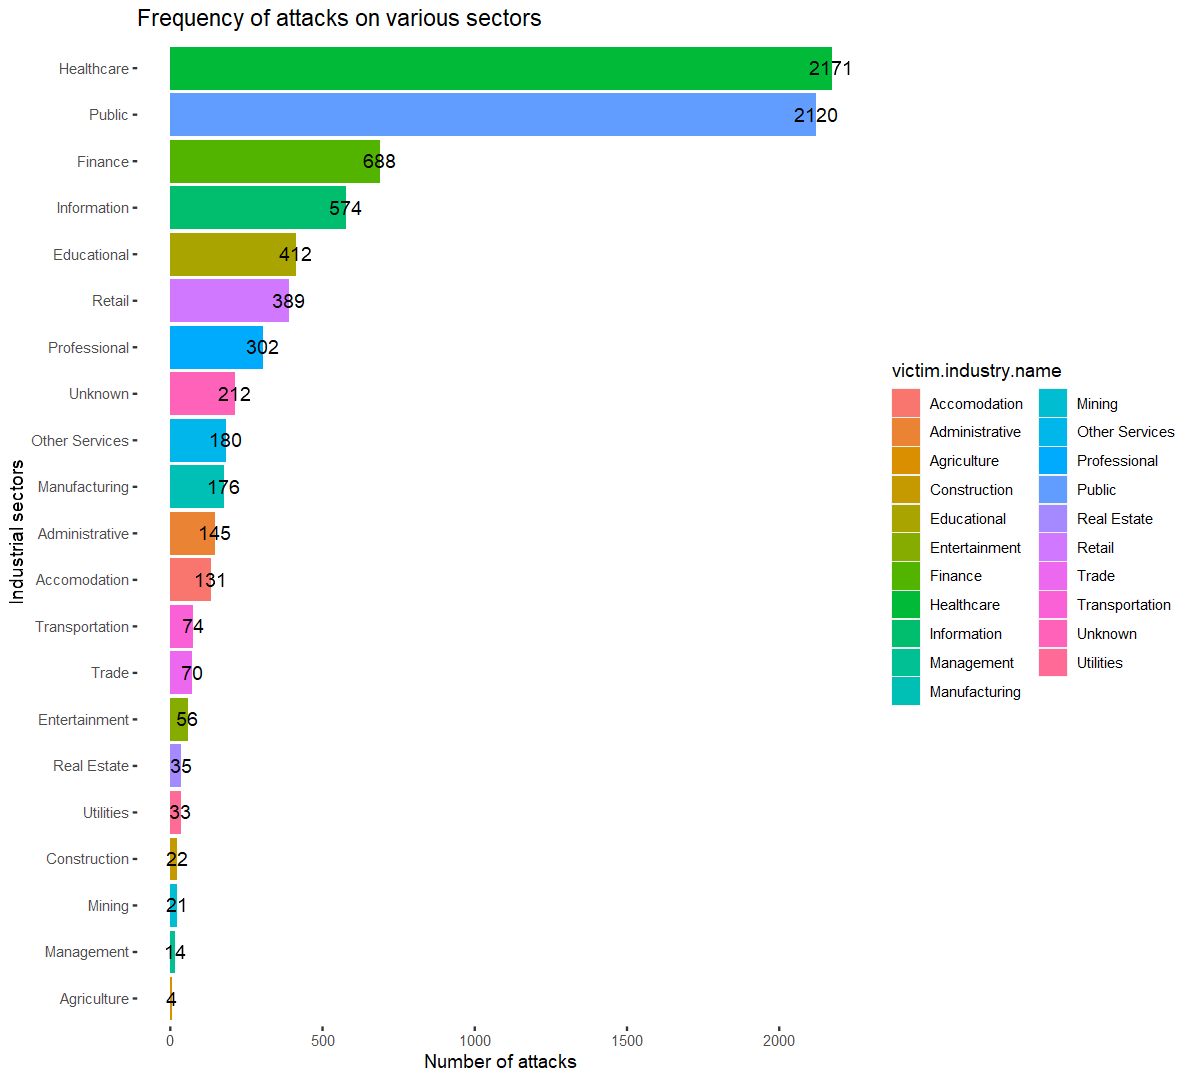

In [160]:
freq_g <- ggplot(freq, aes(x = reorder(victim.industry.name, count), y = count, fill=victim.industry.name)) +
         geom_bar(stat = "identity")+ coord_flip()+geom_text(aes(label = count))+theme(panel.background = element_blank())+ggtitle("Frequency of attacks on various sectors")+
labs(x="Industrial sectors", y="Number of attacks")
freq_g

In [203]:
dft2<- dft1

dft2<-dft2%>%
  select(matches("action.|incident|victim.industry.name"))
head(dft2)

victim.industry.name incident_id                         
1 Public               0001AA7F-C601-424A-B2B8-BE6C9F5164E7
2 Healthcare           0008DADB-E83D-4278-A19A-CEE01610CF43
3 Healthcare           000D403E-2DC9-4EA7-9294-BD3938D1C3C7
4 Information          0012CC25-9167-40D8-8FE3-3D0DFD8FB6BB
5 Public               00163384-B4D7-46D5-9E6F-543DFB00F598
6 Healthcare           9eda6e80-de98-11e7-9424-7b935f12be98
  action.hacking.result.Elevate action.hacking.result.Exfiltrate
1 FALSE                         FALSE                           
2 FALSE                         FALSE                           
3 FALSE                         FALSE                           
4 FALSE                         FALSE                           
5 FALSE                         FALSE                           
6 FALSE                         FALSE                           
  action.hacking.result.Infiltrate
1 FALSE                           
2 FALSE                           
3 FALSE                           
4 FALSE                           
5 FALSE                           
6 FALSE                           
  action.hacking.variety.Abuse of functionality
1 FALSE                                        
2 FALSE                                        
3 FALSE                                        
4 FALSE                                        
5 FALSE                                        
6 FALSE                                        
  action.hacking.variety.Brute force action.hacking.variety.Buffer overflow
1 FALSE                              FALSE                                 
2 FALSE                              FALSE                                 
3 FALSE                              FALSE                                 
4 FALSE                              FALSE                                 
5 FALSE                              FALSE                                 
6 FALSE                              FALSE                                 
  action.hacking.variety.Cryptanalysis action.hacking.variety.DoS ⋯
1 FALSE                                FALSE                      ⋯
2 FALSE                                FALSE                      ⋯
3 FALSE                                FALSE                      ⋯
4 FALSE                                FALSE                      ⋯
5 FALSE                                FALSE                      ⋯
6 FALSE                                FALSE                      ⋯
  action.social.vector.Software action.social.vector.Unknown
1 FALSE                         FALSE                       
2 FALSE                         FALSE                       
3 FALSE                         FALSE                       
4 FALSE                         FALSE                       
5 FALSE                         FALSE                       
6 FALSE                         FALSE                       
  action.social.vector.Website action.unknown.result.Exfiltrate
1 FALSE                        FALSE                           
2 FALSE                        FALSE                           
3 FALSE                        FALSE                           
4 FALSE                        FALSE                           
5 FALSE                        FALSE                           
6 FALSE                        FALSE                           
  action.unknown.result.Infiltrate action.Malware action.Hacking action.Social
1 FALSE                            FALSE          FALSE          FALSE        
2 FALSE                            FALSE          FALSE          FALSE        
3 FALSE                            FALSE          FALSE          FALSE        
4 FALSE                            FALSE           TRUE          FALSE        
5 FALSE                            FALSE          FALSE          FALSE        
6 FALSE                            FALSE           TRUE          FALSE        
  action.Misuse action.Unknown
1  TRUE         FALSE         
2 FALSE         FALSE         
3 FALSE         F

In [185]:
dft3<- subset(dft2, select = -incident_id )

In [187]:
dim(dft3)
dft3

[1] 7829  152

victim.industry.name action.hacking.result.Elevate
1    Public               FALSE                        
2    Healthcare           FALSE                        
3    Healthcare           FALSE                        
4    Information          FALSE                        
5    Public               FALSE                        
6    Healthcare           FALSE                        
7    Utilities            FALSE                        
8    Other Services       FALSE                        
9    Public               FALSE                        
10   Public               FALSE                        
11   Healthcare           FALSE                        
12   Public               FALSE                        
13   Healthcare           FALSE                        
14   Finance              FALSE                        
15   Finance              FALSE                        
16   Public               FALSE                        
17   Healthcare           FALSE                        
18   Educational          FALSE                        
19   Finance              FALSE                        
20   Healthcare           FALSE                        
21   Retail               FALSE                        
22   Healthcare           FALSE                        
23   Public               FALSE                        
24   Educational          FALSE                        
25   Healthcare           FALSE                        
26   Healthcare           FALSE                        
27   Educational          FALSE                        
28   Healthcare           FALSE                        
29   Manufacturing        FALSE                        
30   Finance              FALSE                        
⋮    ⋮                    ⋮                            
7800 Accomodation         FALSE                        
7801 Public               FALSE                        
7802 Finance              FALSE                        
7803 Educational          FALSE                        
7804 Healthcare           FALSE                        
7805 Public               FALSE                        
7806 Healthcare           FALSE                        
7807 Public               FALSE                        
7808 Other Services       FALSE                        
7809 Finance              FALSE                        
7810 Unknown              FALSE                        
7811 Healthcare           FALSE                        
7812 Professional         FALSE                        
7813 Healthcare           FALSE                        
7814 Finance              FALSE                        
7815 Public               FALSE                        
7816 Healthcare           FALSE                        
7817 Healthcare           FALSE                        
7818 Healthcare           FALSE                        
7819 Information          FALSE                        
7820 Healthcare           FALSE                        
7821 Professional         FALSE                        
7822 Healthcare           FALSE                        
7823 Unknown              FALSE                        
7824 Public               FALSE                        
7825 Healthcare           FALSE                        
7826 Finance              FALSE                        
7827 Professional         FALSE                        
7828 Healthcare           FALSE                        
7829 Public               FALSE                        
     action.hacking.result.Exfiltrate action.hacking.result.Infiltrate
1    FALSE                            FALSE                           
2    FALSE                            FALSE                           
3    FALSE                            FALSE                           
4    FALSE                            FALSE                           
5    FALSE                            FALSE                           
6    FALSE                            FALSE                           
7    FALSE                          

In [190]:
true_counts3 <- dft3 %>%
  group_by(victim.industry.name	) %>%
  summarise_all(funs(sum(. == TRUE)))
dim(true_counts)

Warning message:
"`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))"


[1]  21 152

In [191]:
true_counts3

victim.industry.name action.hacking.result.Elevate
1  Accomodation         0                            
2  Administrative       0                            
3  Agriculture          0                            
4  Construction         0                            
5  Educational          0                            
6  Entertainment        0                            
7  Finance              0                            
8  Healthcare           0                            
9  Information          1                            
10 Management           0                            
11 Manufacturing        0                            
12 Mining               0                            
13 Other Services       0                            
14 Professional         0                            
15 Public               0                            
16 Real Estate          0                            
17 Retail               0                            
18 Trade                0                            
19 Transportation       0                            
20 Unknown              0                            
21 Utilities            0                            
   action.hacking.result.Exfiltrate action.hacking.result.Infiltrate
1   0                                0                              
2   4                                2                              
3   0                                0                              
4   0                                0                              
5   1                                2                              
6   3                                4                              
7   4                                1                              
8  20                               14                              
9  14                               11                              
10  0                                0                              
11  2                                0                              
12  0                                0                              
13  0                                1                              
14  4                                5                              
15  6                                4                              
16  0                                0                              
17  4                                4                              
18  0                                0                              
19  1                                1                              
20  0                                0                              
21  0                                0                              
   action.hacking.variety.Abuse of functionality
1   1                                           
2   1                                           
3   0                                           
4   1                                           
5   2                                           
6   1                                           
7   2                                           
8   0                                           
9  10                                           
10  0                                           
11  1                                           
12  0                                           
13  1                                           
14  4                                           
15  4                                           
16  0                                           
17  1                                           
18  0                                           
19  1                                           
20  2                                           
21  0                                           
   action.hacking.variety.Brute force action.hacking.variety.Buffer overflow
1   7                                 0                                     
2   3                                 0                          

In [192]:
#top 3 column/types of attacks on each industry with the count
df_long <- true_counts3 %>%
  pivot_longer(cols = -victim.industry.name, names_to = "variable", values_to = "value")

top3_cols <- df_long %>%
  group_by(victim.industry.name, variable) %>%
  summarise(value = max(value, na.rm = TRUE)) %>%
  group_by(victim.industry.name) %>%
  slice_max(order_by = value, n = 3)
top3_cols

`summarise()` has grouped output by 'victim.industry.name'. You can override using the `.groups` argument.


victim.industry.name variable                               value
1  Accomodation         action.Hacking                          44  
2  Accomodation         action.Malware                          40  
3  Accomodation         action.Misuse                           36  
4  Administrative       action.Hacking                          52  
5  Administrative       action.hacking.variety.Unknown          40  
6  Administrative       action.Misuse                           39  
7  Agriculture          action.Hacking                           2  
8  Agriculture          action.hacking.vector.Web application    2  
9  Agriculture          action.Misuse                            1  
10 Agriculture          action.hacking.variety.DoS               1  
11 Agriculture          action.hacking.variety.Unknown           1  
12 Agriculture          action.misuse.variety.Possession abuse   1  
13 Agriculture          action.misuse.variety.Privilege abuse    1  
14 Agriculture          action.misuse.vector.LAN access          1  
15 Agriculture          action.misuse.vector.Physical access     1  
16 Construction         action.Misuse                            6  
17 Construction         action.Social                            5  
18 Construction         action.Hacking                           4  
19 Educational          action.Hacking                         149  
20 Educational          action.hacking.variety.Unknown         109  
21 Educational          action.hacking.vector.Unknown           74  
22 Entertainment        action.Hacking                          25  
23 Entertainment        action.hacking.variety.Unknown          17  
24 Entertainment        action.hacking.vector.Unknown           14  
25 Finance              action.Hacking                         141  
26 Finance              action.Misuse                          115  
27 Finance              action.hacking.variety.Unknown          84  
28 Finance              action.misuse.variety.Privilege abuse   84  
29 Healthcare           action.Misuse                          582  
30 Healthcare           action.misuse.variety.Privilege abuse  392  
⋮  ⋮                    ⋮                                      ⋮    
42 Mining               action.Hacking                           7  
43 Mining               action.Social                            6  
44 Other Services       action.Hacking                          90  
45 Other Services       action.hacking.variety.Unknown          68  
46 Other Services       action.hacking.vector.Web application   59  
47 Professional         action.Hacking                         137  
48 Professional         action.hacking.variety.Unknown          86  
49 Professional         action.hacking.vector.Web application   63  
50 Public               action.Misuse                          469  
51 Public               action.Hacking                         431  
52 Public               action.misuse.variety.Privilege abuse  359  
53 Real Estate          action.Misuse                            9  
54 Real Estate          action.Hacking                           8  
55 Real Estate          action.misuse.variety.Privilege abuse    6  
56 Real Estate          action.misuse.vector.LAN access          6  
57 Retail               action.Hacking                         108  
58 Retail               action.hacking.variety.Unknown          90  
59 Retail               action.hacking.vector.Web application   68  
60 Trade                action.Hacking                          33  
61 Trade                action.hacking.variety.Unknown          23  
62 Trade                action.hacking.vector.Unknown           17  
63 Transportation       action.Hacking                          21  
64 Transportation       action.Misuse                           17  
65 Transportation       action.hacking.vector.Web application   13  
66 Unknown              action.Hacking                         103  
67 Unknown              action.hacking.vector.Web application   59  
6

In [195]:
sum(top3_cols$value)

[1] 6002

In [197]:
top3_cols_desc<- top3_cols%>%
group_by(victim.industry.name)%>%
filter(value>1)%>%
arrange(desc(value))
top3_cols_desc

victim.industry.name variable                              value
1  Healthcare           action.Misuse                         582  
2  Public               action.Misuse                         469  
3  Public               action.Hacking                        431  
4  Information          action.Hacking                        415  
5  Healthcare           action.misuse.variety.Privilege abuse 392  
6  Healthcare           action.misuse.vector.LAN access       385  
7  Public               action.misuse.variety.Privilege abuse 359  
8  Information          action.hacking.vector.Web application 260  
9  Information          action.hacking.variety.Unknown        255  
10 Educational          action.Hacking                        149  
11 Finance              action.Hacking                        141  
12 Professional         action.Hacking                        137  
13 Finance              action.Misuse                         115  
14 Educational          action.hacking.variety.Unknown        109  
15 Retail               action.Hacking                        108  
16 Unknown              action.Hacking                        103  
17 Other Services       action.Hacking                         90  
18 Retail               action.hacking.variety.Unknown         90  
19 Professional         action.hacking.variety.Unknown         86  
20 Finance              action.hacking.variety.Unknown         84  
21 Finance              action.misuse.variety.Privilege abuse  84  
22 Educational          action.hacking.vector.Unknown          74  
23 Manufacturing        action.Hacking                         70  
24 Other Services       action.hacking.variety.Unknown         68  
25 Retail               action.hacking.vector.Web application  68  
26 Professional         action.hacking.vector.Web application  63  
27 Other Services       action.hacking.vector.Web application  59  
28 Unknown              action.hacking.vector.Web application  59  
29 Administrative       action.Hacking                         52  
30 Unknown              action.hacking.variety.Unknown         50  
⋮  ⋮                    ⋮                                     ⋮    
35 Administrative       action.hacking.variety.Unknown        40   
36 Administrative       action.Misuse                         39   
37 Accomodation         action.Misuse                         36   
38 Trade                action.Hacking                        33   
39 Entertainment        action.Hacking                        25   
40 Trade                action.hacking.variety.Unknown        23   
41 Transportation       action.Hacking                        21   
42 Utilities            action.Hacking                        18   
43 Entertainment        action.hacking.variety.Unknown        17   
44 Trade                action.hacking.vector.Unknown         17   
45 Transportation       action.Misuse                         17   
46 Entertainment        action.hacking.vector.Unknown         14   
47 Transportation       action.hacking.vector.Web application 13   
48 Utilities            action.Malware                        10   
49 Real Estate          action.Misuse                          9   
50 Utilities            action.Social                          9   
51 Mining               action.Malware                         8   
52 Real Estate          action.Hacking                         8   
53 Mining               action.Hacking                         7   
54 Construction         action.Misuse                          6   
55 Mining               action.Social                          6   
56 Real Estate          action.misuse.variety.Privilege abuse  6   
57 Real Estate          action.misuse.vector.LAN access        6   
58 Construction         action.Social                          5   
59 Management           action.Hacking                         5   
60 Construction         action.Hacking                         4   
61 Management           action.hacking.vector.Web applicati

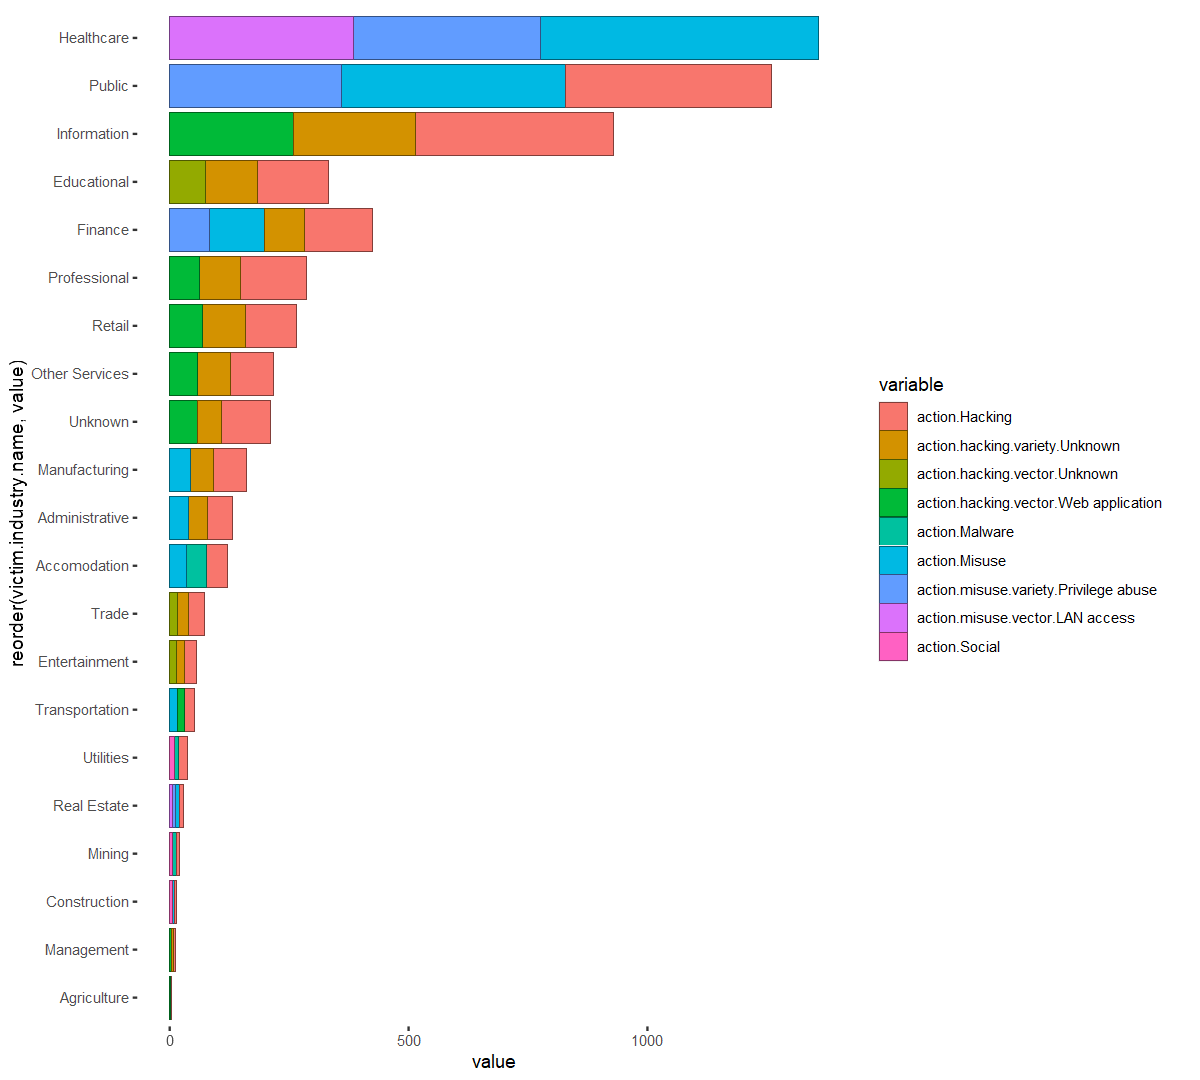

In [198]:
industry_ac <- ggplot(top3_cols_desc, aes(x = reorder(victim.industry.name, value), y = value, fill=variable)) +
         geom_bar(stat = "identity", colour='black', size=0.10)+ coord_flip()+theme(panel.background = element_blank())#
industry_ac

In [ ]:
#values of the max type of attck of each industry 
max_values <- apply(true_counts[-1], 1, function(x) {
  max_col <- which.max(x)
  max_val <- x[max_col]
  c(max_col, max_val)
})

max_columns <- names(true_counts)[-1][max_values[1,]]
max_values <- max_values[2,]

result <- data.frame(victim.industry.name = true_counts$victim.industry.name, max_column = max_columns, max_value = max_values)
result


In [146]:
#getting the sum of all aolumns for each row which is every industry
true_counts <- dft1 %>%
  group_by(victim.industry.name	) %>%
  summarise_all(funs(sum(. == TRUE)))
dim(true_counts)
'incident_id' %in% names(df)

Warning message:
"`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))"


[1]  21 153

[1] TRUE

In [133]:
true_counts

victim.industry.name incident_id action.hacking.result.Elevate
1  Accomodation         0           0                            
2  Administrative       0           0                            
3  Agriculture          0           0                            
4  Construction         0           0                            
5  Educational          0           0                            
6  Entertainment        0           0                            
7  Finance              0           0                            
8  Healthcare           0           0                            
9  Information          0           1                            
10 Management           0           0                            
11 Manufacturing        0           0                            
12 Mining               0           0                            
13 Other Services       0           0                            
14 Professional         0           0                            
15 Public               0           0                            
16 Real Estate          0           0                            
17 Retail               0           0                            
18 Trade                0           0                            
19 Transportation       0           0                            
20 Unknown              0           0                            
21 Utilities            0           0                            
   action.hacking.result.Exfiltrate action.hacking.result.Infiltrate
1   0                                0                              
2   4                                2                              
3   0                                0                              
4   0                                0                              
5   1                                2                              
6   3                                4                              
7   4                                1                              
8  20                               14                              
9  14                               11                              
10  0                                0                              
11  2                                0                              
12  0                                0                              
13  0                                1                              
14  4                                5                              
15  6                                4                              
16  0                                0                              
17  4                                4                              
18  0                                0                              
19  1                                1                              
20  0                                0                              
21  0                                0                              
   action.hacking.variety.Abuse of functionality
1   1                                           
2   1                                           
3   0                                           
4   1                                           
5   2                                           
6   1                                           
7   2                                           
8   0                                           
9  10                                           
10  0                                           
11  1                                           
12  0                                           
13  1                                           
14  4                                           
15  4                                           
16  0                                           
17  1                                           
18  0                                           
19  1                                           
20  2                                           
21  

In [134]:
#getting the sum total of all counts from 2nd column to the last, new column called Total
true_countst1<-true_counts %>%
    mutate(Total = select(., action.hacking.result.Elevate:action.Unknown) %>% rowSums())
true_countst1

victim.industry.name incident_id action.hacking.result.Elevate
1  Accomodation         0           0                            
2  Administrative       0           0                            
3  Agriculture          0           0                            
4  Construction         0           0                            
5  Educational          0           0                            
6  Entertainment        0           0                            
7  Finance              0           0                            
8  Healthcare           0           0                            
9  Information          0           1                            
10 Management           0           0                            
11 Manufacturing        0           0                            
12 Mining               0           0                            
13 Other Services       0           0                            
14 Professional         0           0                            
15 Public               0           0                            
16 Real Estate          0           0                            
17 Retail               0           0                            
18 Trade                0           0                            
19 Transportation       0           0                            
20 Unknown              0           0                            
21 Utilities            0           0                            
   action.hacking.result.Exfiltrate action.hacking.result.Infiltrate
1   0                                0                              
2   4                                2                              
3   0                                0                              
4   0                                0                              
5   1                                2                              
6   3                                4                              
7   4                                1                              
8  20                               14                              
9  14                               11                              
10  0                                0                              
11  2                                0                              
12  0                                0                              
13  0                                1                              
14  4                                5                              
15  6                                4                              
16  0                                0                              
17  4                                4                              
18  0                                0                              
19  1                                1                              
20  0                                0                              
21  0                                0                              
   action.hacking.variety.Abuse of functionality
1   1                                           
2   1                                           
3   0                                           
4   1                                           
5   2                                           
6   1                                           
7   2                                           
8   0                                           
9  10                                           
10  0                                           
11  1                                           
12  0                                           
13  1                                           
14  4                                           
15  4                                           
16  0                                           
17  1                                           
18  0                                           
19  1                                           
20  2                                           
21  

In [135]:
#selecting only the industry and the total column
true_countst2<- true_countst1 %>% 
select(victim.industry.name, Total)%>%
arrange(desc(Total))
true_countst2

victim.industry.name Total
1  Public               5106 
2  Healthcare           3438 
3  Information          1821 
4  Finance              1134 
5  Professional          933 
6  Educational           852 
7  Unknown               763 
8  Retail                669 
9  Manufacturing         549 
10 Other Services        430 
11 Accomodation          403 
12 Administrative        375 
13 Utilities             196 
14 Trade                 189 
15 Transportation        176 
16 Entertainment         143 
17 Mining                112 
18 Real Estate            75 
19 Construction           73 
20 Management             27 
21 Agriculture            11

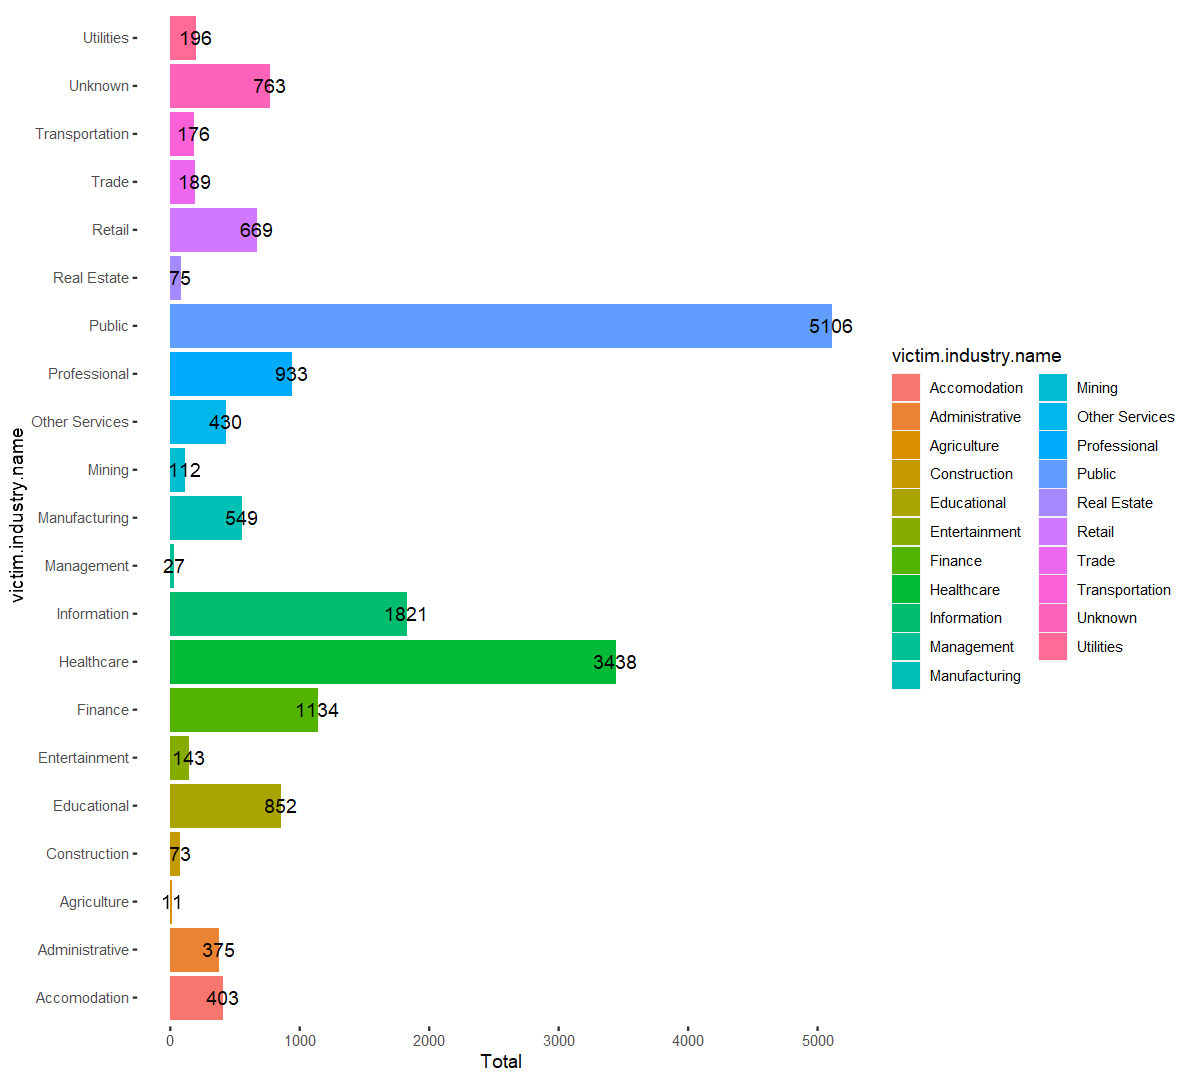

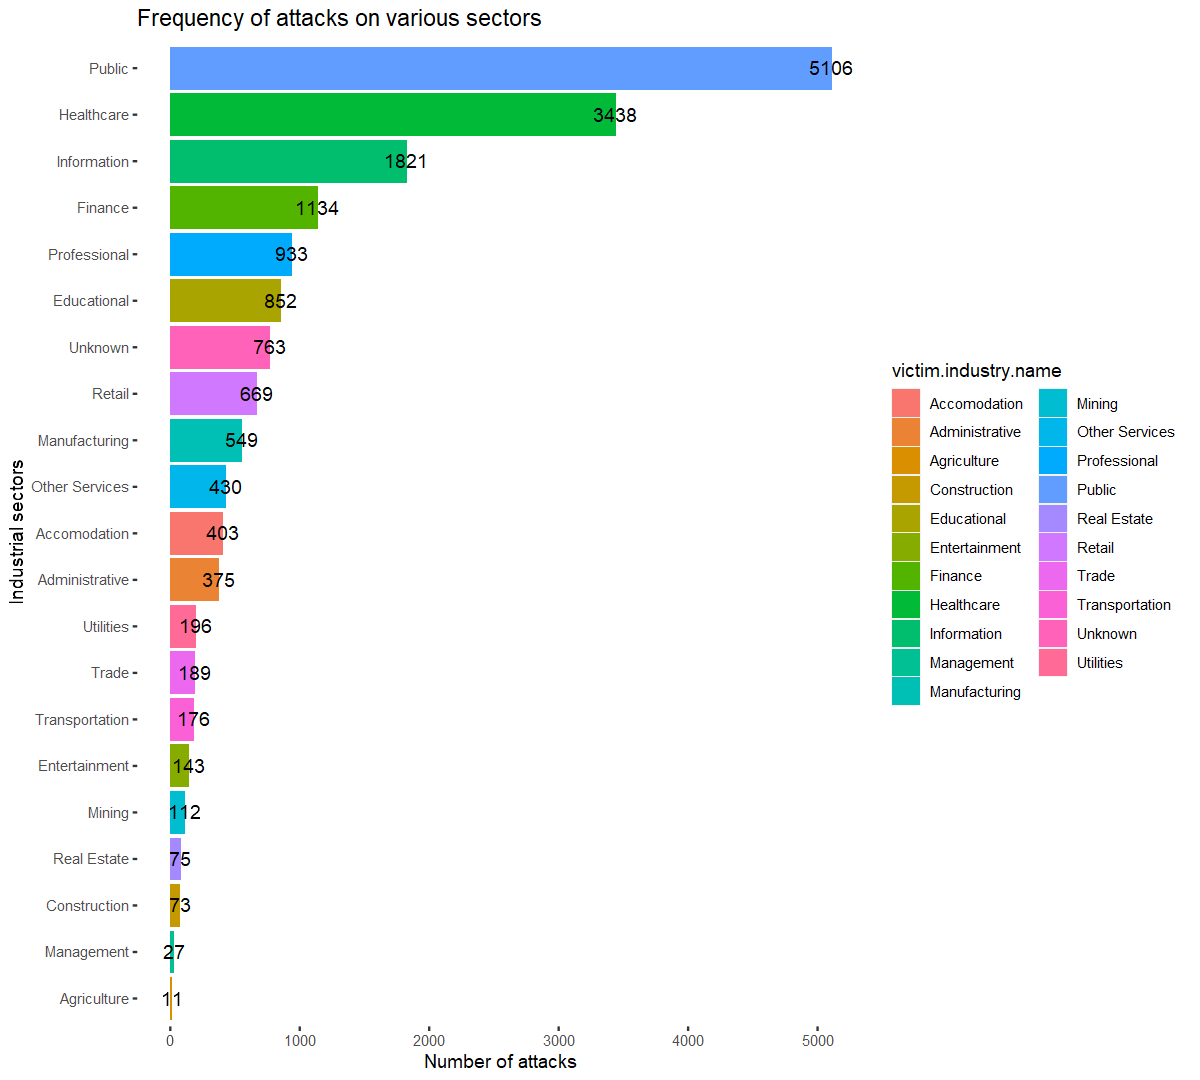

In [136]:
library(ggplot2)

options(repr.plot.width =10, repr.plot.height =9) 

ggplot(true_countst2, aes(x=victim.industry.name, y=Total, fill=victim.industry.name))+
geom_col()+
coord_flip()+
theme(panel.background = element_blank())+
geom_text(aes(label = Total))

p2 <- ggplot(true_countst2, aes(x = reorder(victim.industry.name, Total), y = Total, fill=victim.industry.name)) +
         geom_bar(stat = "identity")+ coord_flip()+geom_text(aes(label = Total))+theme(panel.background = element_blank())+ggtitle("Frequency of attacks on various sectors")+
labs(x="Industrial sectors", y="Number of attacks")
p2

In [167]:
# Assuming your dataframe is named df
library(dplyr)

# Function to get the top 3 columns with the most TRUE values
get_top_columns <- function(freq) {
  # Exclude the 'incident_id' column
  freq <- freq[, !(names(freq) %in% "incident_id")]
  
  sum_true_values <- colSums(df == TRUE)
  top_columns <- names(sort(sum_true_values, decreasing = TRUE))[1:3]
  return(top_columns)
}

# Apply the function to each subset of the dataframe
result <- freq %>%
  group_by(victim.industry.name) %>%
  do(data.frame(top_columns = get_top_columns(.)))

# Print the result
result


victim.industry.name top_columns        
1  Accomodation         victim.industry2.62
2  Accomodation         victim.industry2.92
3  Accomodation         action.Hacking     
4  Administrative       victim.industry2.62
5  Administrative       victim.industry2.92
6  Administrative       action.Hacking     
7  Agriculture          victim.industry2.62
8  Agriculture          victim.industry2.92
9  Agriculture          action.Hacking     
10 Construction         victim.industry2.62
11 Construction         victim.industry2.92
12 Construction         action.Hacking     
13 Educational          victim.industry2.62
14 Educational          victim.industry2.92
15 Educational          action.Hacking     
16 Entertainment        victim.industry2.62
17 Entertainment        victim.industry2.92
18 Entertainment        action.Hacking     
19 Finance              victim.industry2.62
20 Finance              victim.industry2.92
21 Finance              action.Hacking     
22 Healthcare           victim.industry2.62
23 Healthcare           victim.industry2.92
24 Healthcare           action.Hacking     
25 Information          victim.industry2.62
26 Information          victim.industry2.92
27 Information          action.Hacking     
28 Management           victim.industry2.62
29 Management           victim.industry2.92
30 Management           action.Hacking     
⋮  ⋮                    ⋮                  
34 Mining               victim.industry2.62
35 Mining               victim.industry2.92
36 Mining               action.Hacking     
37 Other Services       victim.industry2.62
38 Other Services       victim.industry2.92
39 Other Services       action.Hacking     
40 Professional         victim.industry2.62
41 Professional         victim.industry2.92
42 Professional         action.Hacking     
43 Public               victim.industry2.62
44 Public               victim.industry2.92
45 Public               action.Hacking     
46 Real Estate          victim.industry2.62
47 Real Estate          victim.industry2.92
48 Real Estate          action.Hacking     
49 Retail               victim.industry2.62
50 Retail               victim.industry2.92
51 Retail               action.Hacking     
52 Trade                victim.industry2.62
53 Trade                victim.industry2.92
54 Trade                action.Hacking     
55 Transportation       victim.industry2.62
56 Transportation       victim.industry2.92
57 Transportation       action.Hacking     
58 Unknown              victim.industry2.62
59 Unknown              victim.industry2.92
60 Unknown              action.Hacking     
61 Utilities            victim.industry2.62
62 Utilities            victim.industry2.92
63 Utilities            action.Hacking

In [173]:
# Assuming your dataframe is named df
library(dplyr)

# Function to get the top 3 columns with the most TRUE values
get_top_columns <- function(freq) {
  # Exclude the 'incident_id' column
  freq <- freq[, !(names(freq) %in% "incident_id")]
  
  # Only consider columns that contain 'action.' in their names
  freq <- freq[, grepl("action.", names(freq))]
  
  sum_true_values <- colSums(df == TRUE)
  
  # Sort the sums in decreasing order and get the names of the top 3 columns
  top_columns <- names(sort(sum_true_values, decreasing = TRUE))[1:3]
  
  return(top_columns)
}

# Apply the function to each subset of the dataframe
result <- freq %>%
  group_by(victim.industry.name) %>%
  do(data.frame(top_columns = get_top_columns(.)))

# Print the result
print(result)

# A tibble: 63 × 2
# Groups:   victim.industry.name [21]
   victim.industry.name top_columns        
   <chr>                <chr>              
 1 Accomodation         victim.industry2.62
 2 Accomodation         victim.industry2.92
 3 Accomodation         action.Hacking     
 4 Administrative       victim.industry2.62
 5 Administrative       victim.industry2.92
 6 Administrative       action.Hacking     
 7 Agriculture          victim.industry2.62
 8 Agriculture          victim.industry2.92
 9 Agriculture          action.Hacking     
10 Construction         victim.industry2.62
# ℹ 53 more rows


victim.industry.name count
1  Healthcare           2171 
2  Public               2120 
3  Finance               688 
4  Information           574 
5  Educational           412 
6  Retail                389 
7  Professional          302 
8  Unknown               212 
9  Other Services        180 
10 Manufacturing         176 
11 Administrative        145 
12 Accomodation          131 
13 Transportation         74 
14 Trade                  70 
15 Entertainment          56 
16 Real Estate            35 
17 Utilities              33 
18 Construction           22 
19 Mining                 21 
20 Management             14 
21 Agriculture             4

In [138]:
#values of the max type of attck of each industry 
max_values <- apply(true_counts[-1], 1, function(x) {
  max_col <- which.max(x)
  max_val <- x[max_col]
  c(max_col, max_val)
})

max_columns <- names(true_counts)[-1][max_values[1,]]
max_values <- max_values[2,]

result <- data.frame(victim.industry.name = true_counts$victim.industry.name, max_column = max_columns, max_value = max_values)
result


victim.industry.name max_column                            max_value
1  Accomodation         action.Hacking                         44      
2  Administrative       action.Hacking                         52      
3  Agriculture          action.hacking.vector.Web application   2      
4  Construction         action.Misuse                           6      
5  Educational          action.Hacking                        149      
6  Entertainment        action.Hacking                         25      
7  Finance              action.Hacking                        141      
8  Healthcare           action.Misuse                         582      
9  Information          action.Hacking                        415      
10 Management           action.Hacking                          5      
11 Manufacturing        action.Hacking                         70      
12 Mining               action.Malware                          8      
13 Other Services       action.Hacking                         90      
14 Professional         action.Hacking                        137      
15 Public               action.Misuse                         469      
16 Real Estate          action.Misuse                           9      
17 Retail               action.Hacking                        108      
18 Trade                action.Hacking                         33      
19 Transportation       action.Hacking                         21      
20 Unknown              action.Hacking                        103      
21 Utilities            action.Hacking                         18

In [139]:
arrange(result, desc(max_value))

victim.industry.name max_column                            max_value
1  Healthcare           action.Misuse                         582      
2  Public               action.Misuse                         469      
3  Information          action.Hacking                        415      
4  Educational          action.Hacking                        149      
5  Finance              action.Hacking                        141      
6  Professional         action.Hacking                        137      
7  Retail               action.Hacking                        108      
8  Unknown              action.Hacking                        103      
9  Other Services       action.Hacking                         90      
10 Manufacturing        action.Hacking                         70      
11 Administrative       action.Hacking                         52      
12 Accomodation         action.Hacking                         44      
13 Trade                action.Hacking                         33      
14 Entertainment        action.Hacking                         25      
15 Transportation       action.Hacking                         21      
16 Utilities            action.Hacking                         18      
17 Real Estate          action.Misuse                           9      
18 Mining               action.Malware                          8      
19 Construction         action.Misuse                           6      
20 Management           action.Hacking                          5      
21 Agriculture          action.hacking.vector.Web application   2

In [140]:
table(is.na(true_counts))


FALSE 
 3213 

In [141]:
#top 3 column/types of attacks on each industry with the count
df_long <- true_counts %>%
  pivot_longer(cols = -victim.industry.name, names_to = "variable", values_to = "value")

top3_cols <- df_long %>%
  group_by(victim.industry.name, variable) %>%
  summarise(value = max(value, na.rm = TRUE)) %>%
  group_by(victim.industry.name) %>%
  slice_max(order_by = value, n = 3)
top3_cols

`summarise()` has grouped output by 'victim.industry.name'. You can override using the `.groups` argument.


victim.industry.name variable                               value
1  Accomodation         action.Hacking                          44  
2  Accomodation         action.Malware                          40  
3  Accomodation         action.Misuse                           36  
4  Administrative       action.Hacking                          52  
5  Administrative       action.hacking.variety.Unknown          40  
6  Administrative       action.Misuse                           39  
7  Agriculture          action.Hacking                           2  
8  Agriculture          action.hacking.vector.Web application    2  
9  Agriculture          action.Misuse                            1  
10 Agriculture          action.hacking.variety.DoS               1  
11 Agriculture          action.hacking.variety.Unknown           1  
12 Agriculture          action.misuse.variety.Possession abuse   1  
13 Agriculture          action.misuse.variety.Privilege abuse    1  
14 Agriculture          action.misuse.vector.LAN access          1  
15 Agriculture          action.misuse.vector.Physical access     1  
16 Construction         action.Misuse                            6  
17 Construction         action.Social                            5  
18 Construction         action.Hacking                           4  
19 Educational          action.Hacking                         149  
20 Educational          action.hacking.variety.Unknown         109  
21 Educational          action.hacking.vector.Unknown           74  
22 Entertainment        action.Hacking                          25  
23 Entertainment        action.hacking.variety.Unknown          17  
24 Entertainment        action.hacking.vector.Unknown           14  
25 Finance              action.Hacking                         141  
26 Finance              action.Misuse                          115  
27 Finance              action.hacking.variety.Unknown          84  
28 Finance              action.misuse.variety.Privilege abuse   84  
29 Healthcare           action.Misuse                          582  
30 Healthcare           action.misuse.variety.Privilege abuse  392  
⋮  ⋮                    ⋮                                      ⋮    
42 Mining               action.Hacking                           7  
43 Mining               action.Social                            6  
44 Other Services       action.Hacking                          90  
45 Other Services       action.hacking.variety.Unknown          68  
46 Other Services       action.hacking.vector.Web application   59  
47 Professional         action.Hacking                         137  
48 Professional         action.hacking.variety.Unknown          86  
49 Professional         action.hacking.vector.Web application   63  
50 Public               action.Misuse                          469  
51 Public               action.Hacking                         431  
52 Public               action.misuse.variety.Privilege abuse  359  
53 Real Estate          action.Misuse                            9  
54 Real Estate          action.Hacking                           8  
55 Real Estate          action.misuse.variety.Privilege abuse    6  
56 Real Estate          action.misuse.vector.LAN access          6  
57 Retail               action.Hacking                         108  
58 Retail               action.hacking.variety.Unknown          90  
59 Retail               action.hacking.vector.Web application   68  
60 Trade                action.Hacking                          33  
61 Trade                action.hacking.variety.Unknown          23  
62 Trade                action.hacking.vector.Unknown           17  
63 Transportation       action.Hacking                          21  
64 Transportation       action.Misuse                           17  
65 Transportation       action.hacking.vector.Web application   13  
66 Unknown              action.Hacking                         103  
67 Unknown              action.hacking.vector.Web application   59  
6

victim.industry.name variable                               value
1  Healthcare           action.Misuse                          582  
2  Public               action.Misuse                          469  
3  Public               action.Hacking                         431  
4  Information          action.Hacking                         415  
5  Healthcare           action.misuse.variety.Privilege abuse  392  
6  Healthcare           action.misuse.vector.LAN access        385  
7  Public               action.misuse.variety.Privilege abuse  359  
8  Information          action.hacking.vector.Web application  260  
9  Information          action.hacking.variety.Unknown         255  
10 Educational          action.Hacking                         149  
11 Finance              action.Hacking                         141  
12 Professional         action.Hacking                         137  
13 Finance              action.Misuse                          115  
14 Educational          action.hacking.variety.Unknown         109  
15 Retail               action.Hacking                         108  
16 Unknown              action.Hacking                         103  
17 Other Services       action.Hacking                          90  
18 Retail               action.hacking.variety.Unknown          90  
19 Professional         action.hacking.variety.Unknown          86  
20 Finance              action.hacking.variety.Unknown          84  
21 Finance              action.misuse.variety.Privilege abuse   84  
22 Educational          action.hacking.vector.Unknown           74  
23 Manufacturing        action.Hacking                          70  
24 Other Services       action.hacking.variety.Unknown          68  
25 Retail               action.hacking.vector.Web application   68  
26 Professional         action.hacking.vector.Web application   63  
27 Other Services       action.hacking.vector.Web application   59  
28 Unknown              action.hacking.vector.Web application   59  
29 Administrative       action.Hacking                          52  
30 Unknown              action.hacking.variety.Unknown          50  
⋮  ⋮                    ⋮                                      ⋮    
42 Utilities            action.Hacking                         18   
43 Entertainment        action.hacking.variety.Unknown         17   
44 Trade                action.hacking.vector.Unknown          17   
45 Transportation       action.Misuse                          17   
46 Entertainment        action.hacking.vector.Unknown          14   
47 Transportation       action.hacking.vector.Web application  13   
48 Utilities            action.Malware                         10   
49 Real Estate          action.Misuse                           9   
50 Utilities            action.Social                           9   
51 Mining               action.Malware                          8   
52 Real Estate          action.Hacking                          8   
53 Mining               action.Hacking                          7   
54 Construction         action.Misuse                           6   
55 Mining               action.Social                           6   
56 Real Estate          action.misuse.variety.Privilege abuse   6   
57 Real Estate          action.misuse.vector.LAN access         6   
58 Construction         action.Social                           5   
59 Management           action.Hacking                          5   
60 Construction         action.Hacking                          4   
61 Management           action.hacking.vector.Web application   4   
62 Management           action.hacking.variety.Unknown          3   
63 Agriculture          action.Hacking                          2   
64 Agriculture          action.hacking.vector.Web application   2   
65 Agriculture          action.Misuse                           1   
66 Agriculture          action.hacking.variety.DoS              1   
67 Agriculture          action.hacking.variety.Unknown          1   
6

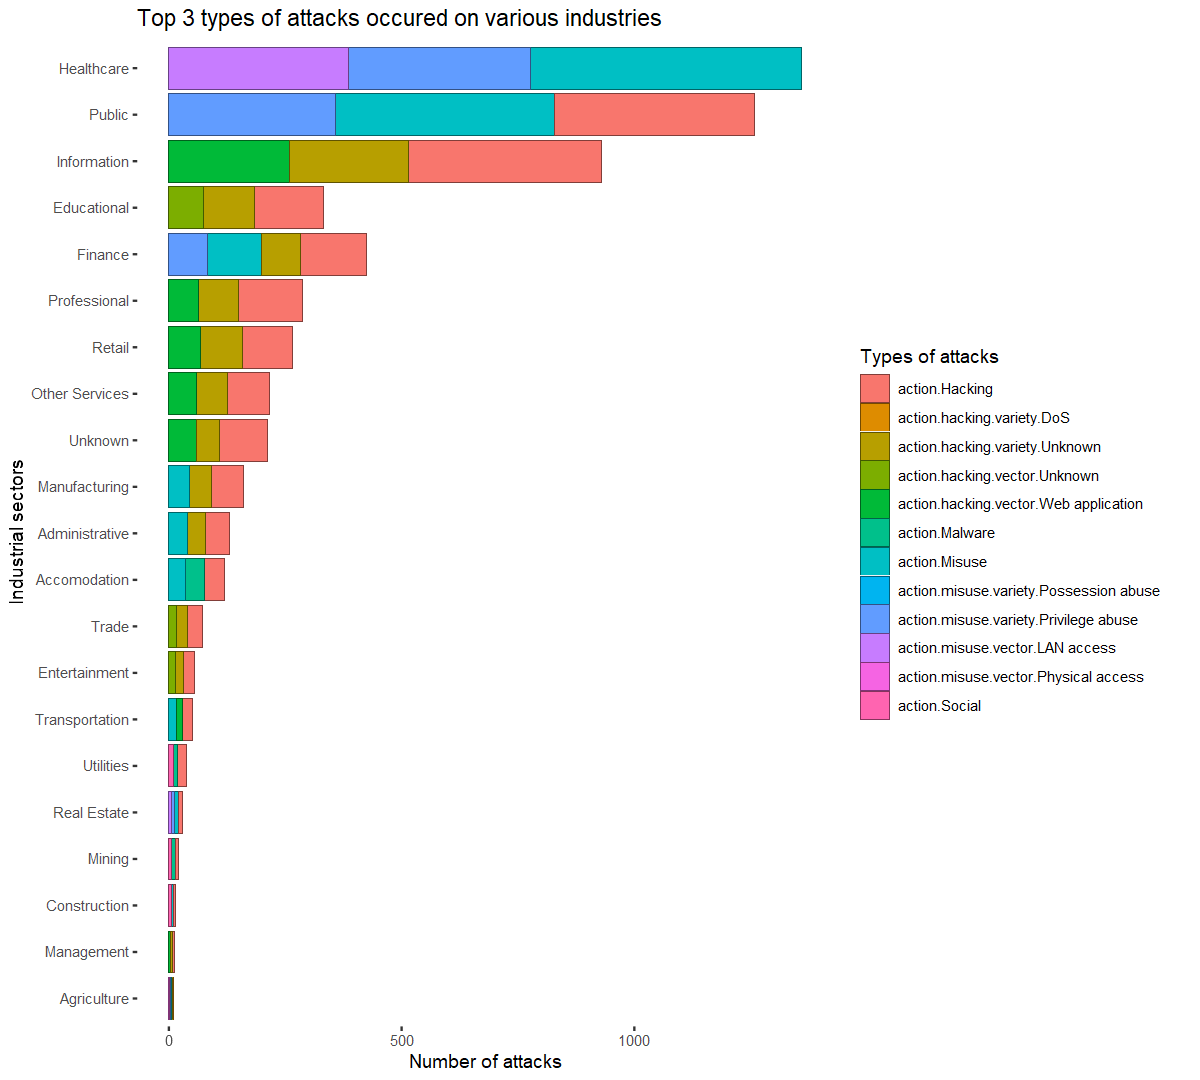

In [202]:
#just rearranging the table above
top3_cols2<- top3_cols%>%
group_by(victim.industry.name, variable)%>%
arrange(desc(value))
top3_cols2

#ggplot(top3_cols2, aes(x=reorder(victim.industry.name, value), y=value, fill=variable))+
#geom_bar(colour='black', size=0.05)+ coord_flip()+
#theme(panel.background = element_blank())

p3 <- ggplot(top3_cols2, aes(x = reorder(victim.industry.name, value), y = value, fill=variable)) +
         geom_bar(stat = "identity", colour='black', size=0.10)+ coord_flip()+theme(panel.background = element_blank())+
theme(panel.background = element_blank())+ggtitle("Top 3 types of attacks occured on various industries")+
labs(x="Industrial sectors", y="Number of attacks")+labs(fill= "Types of attacks")
p3